In [1]:
install.packages('igraph')
install.packages('Matrix')
install.packages('pracma')

package 'igraph' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Wenyi\AppData\Local\Temp\RtmpktkjWL\downloaded_packages
package 'Matrix' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Wenyi\AppData\Local\Temp\RtmpktkjWL\downloaded_packages
package 'pracma' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Wenyi\AppData\Local\Temp\RtmpktkjWL\downloaded_packages


In [2]:
library('igraph')
library('Matrix')
library('pracma')

Warning message:
"package 'igraph' was built under R version 3.6.3"
Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union

Warning message:
"package 'Matrix' was built under R version 3.6.3"Warning message:
"package 'pracma' was built under R version 3.6.3"
Attaching package: 'pracma'

The following objects are masked from 'package:Matrix':

    expm, lu, tril, triu



## Part1_1 Structural properties of the Facebook network

### 1_1 Question 1

In [211]:
g<-read_graph('./facebook_combined/facebook_combined.txt', format = 'edgelist', directed=F)

In [212]:
summary(g)

IGRAPH a8631c3 U--- 4039 88234 -- 


In [213]:
is_connected(g)

[1] TRUE

### 1_1 Question 2

In [5]:
diameter(g)

[1] 8

### 1_1 Question 3

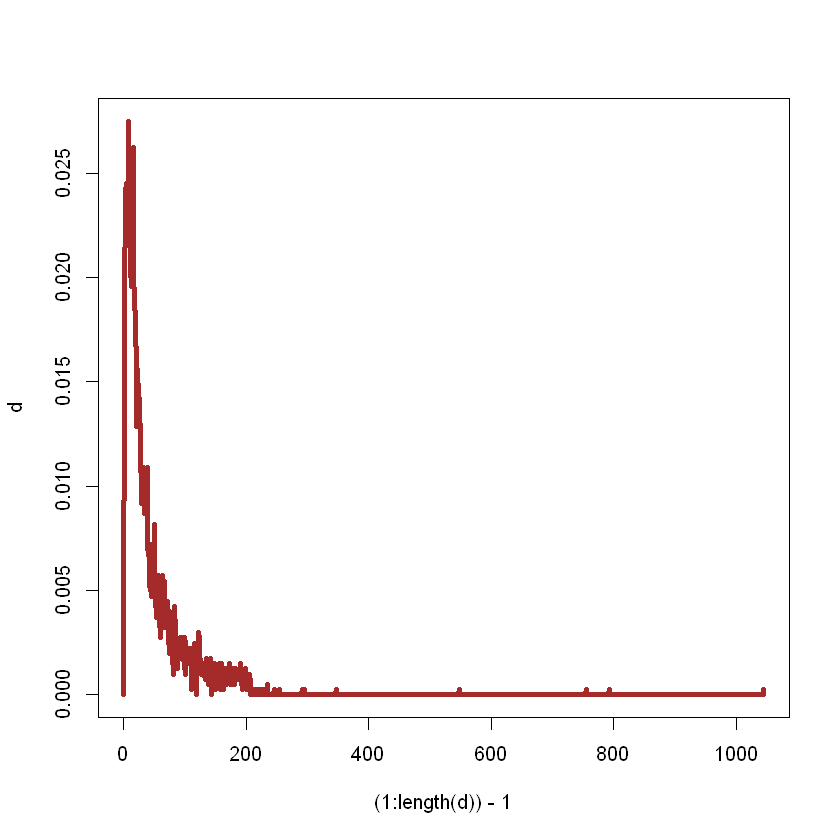

In [6]:
d <- degree_distribution(g)
plot((1:length(d))-1, d, type='l', col=colors()[32],lwd = 4)

In [9]:
mean(degree(g))

[1] 43.69101

### 1_1 Question 4

Warning message in xy.coords(x, y, xlabel, ylabel, log):
"1 x value <= 0 omitted from logarithmic plot"Warning message in xy.coords(x, y, xlabel, ylabel, log):
"819 y values <= 0 omitted from logarithmic plot"

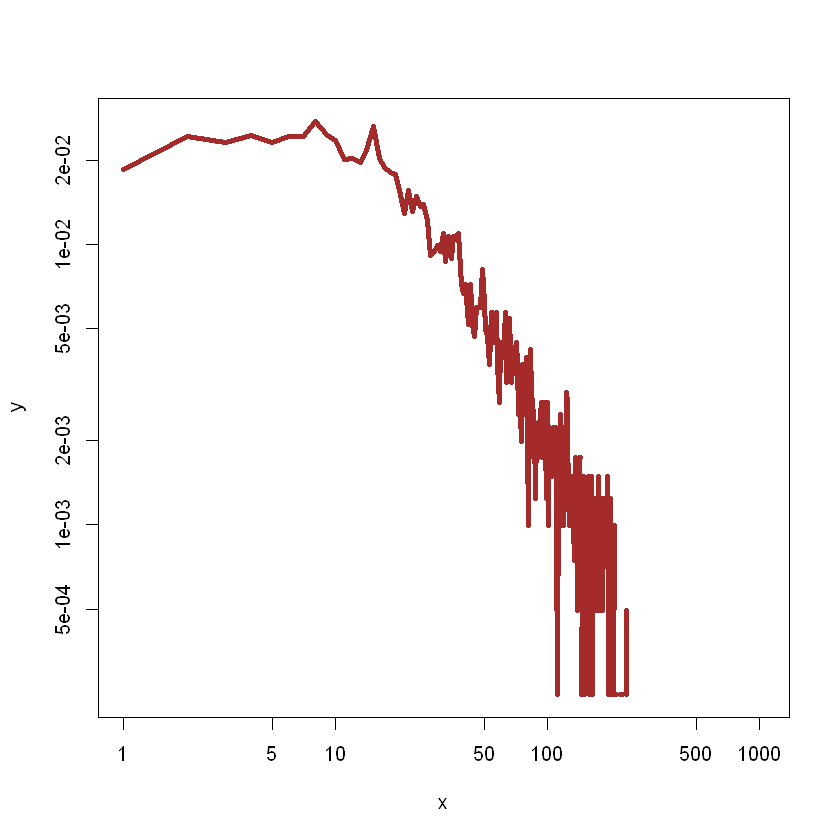

In [9]:
d <- degree_distribution(g)
x <- 1:length(d)-1
y <- d
plot(x, y, log = 'xy', type='l', col=colors()[32],lwd = 4)

In [10]:
x1 <- log10(x[y>0])
y1 <- log10(y[y>0])
lm(y1~x1)


Call:
lm(formula = y1 ~ x1)

Coefficients:
(Intercept)           x1  
    -0.4309      -1.1802  


## Part1_2 Personalized network

### 1_2 Question 5

In [11]:
eg <- make_ego_graph(g, order=1, nodes=1, mode="all")
eg

[[1]]
IGRAPH 0a6c4bf U--- 348 2866 -- 
+ edges from 0a6c4bf:
 [1]  1-- 2  1-- 3  1-- 4  1-- 5  1-- 6  1-- 7  1-- 8  1-- 9  1--10  4--10
[11]  1--11  1--12  1--13  1--14  1--15  1--16  1--17  1--18  1--19  1--20
[21] 18--20  1--21  3--21 15--21  1--22 10--22 14--22  1--23  8--23  1--24
[31]  1--25  1--26  4--26 10--26 22--26  1--27  4--27 10--27 14--27 22--27
[41] 26--27  1--28  1--29 15--29  1--30 17--30  1--31 10--31  1--32  8--32
[51] 22--32 26--32  1--33  1--34  1--35  1--36  1--37  1--38  1--39  8--39
[61]  1--40 22--40 26--40  1--41 22--41 26--41 27--41 30--41  1--42 15--42
[71] 18--42 20--42 21--42 29--42  1--43 34--43  1--44  1--45 21--45 42--45
[81]  1--46  1--47  1--48  1--49  2--49 31--49  1--50  1--51  1--52 24--52
+ ... omitted several edges


### 1_2 Question 6

In [12]:
diameter(eg[[1]])

[1] 2

### 1_2 Question 7___no code

## Part1_3 Core node’s personalized network

### 1_3 Question 8

In [13]:
id <- degree(g, v=V(g)) >= 200
nodes <- V(g)[id]
length(nodes)

[1] 41

In [14]:
mean(degree(g, v=nodes))

[1] 277.439

### 1_3 Question 9

In [15]:
nodes_pool <- c(1, 108, 349, 484, 1087)

[1] 0.4131014


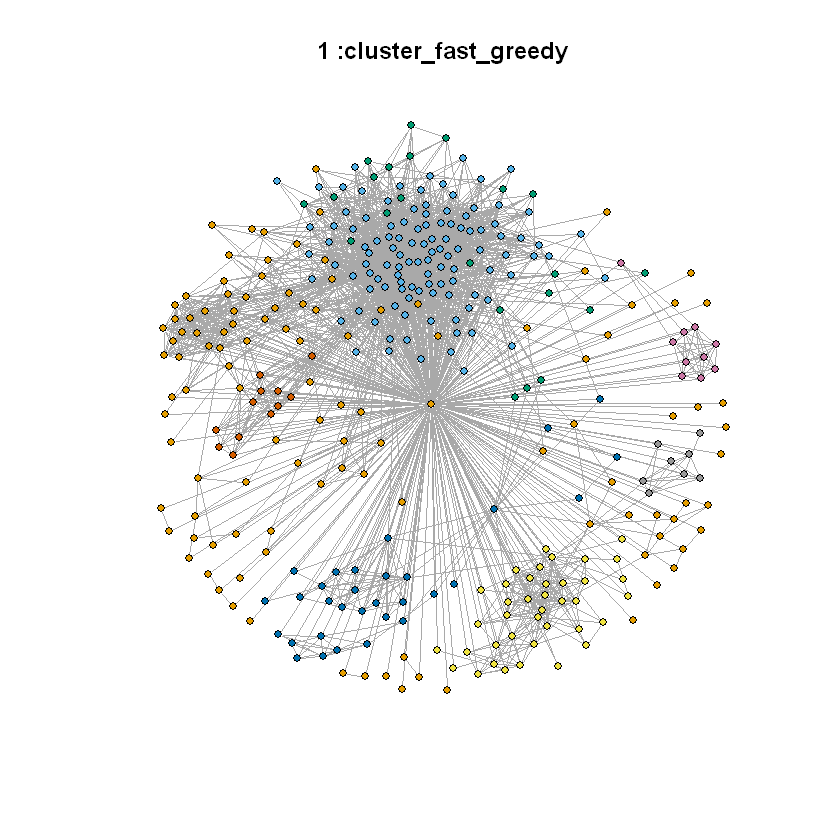

[1] 0.3533022


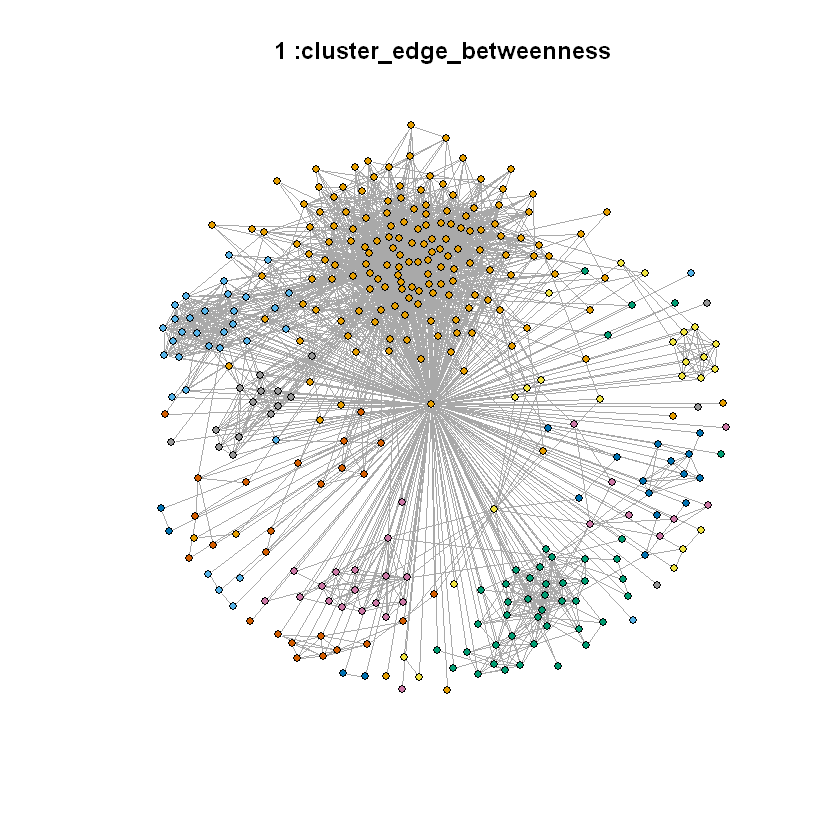

[1] 0.3891185


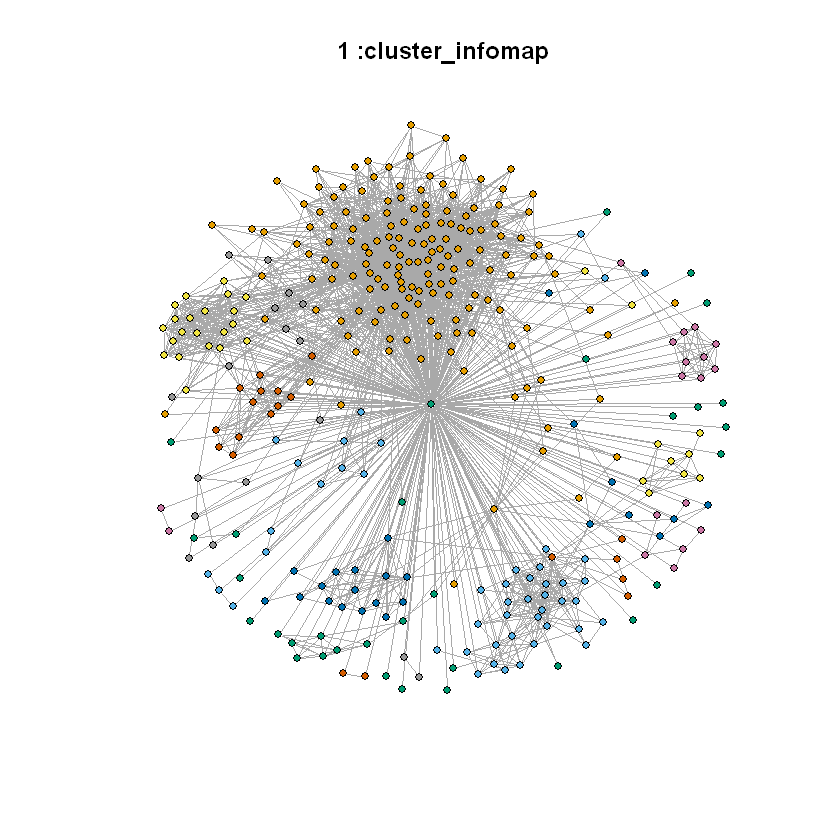

In [16]:
node <- nodes_pool[1]
eg <- make_ego_graph(g, order=1, nodes=node, mode="all")[[1]]
eg_coords <- layout_with_fr(eg)
eg_no_edges <- delete_edges(eg, E(eg))

eg_com1 <- cluster_fast_greedy(eg)
plot(eg, vertex.size=3, vertex.label=NA, vertex.color=membership(eg_com1), 
     layout=eg_coords, main=paste(node,':cluster_fast_greedy'))
print(modularity(eg_com1))


eg_com2 <- cluster_edge_betweenness(eg)
plot(eg,vertex.size=3, vertex.label=NA, 
     vertex.color=membership(eg_com2), 
     layout=eg_coords, main=paste(node,':cluster_edge_betweenness'))
print(modularity(eg_com2))

eg_com3 <- cluster_infomap(eg)
plot(eg,vertex.size=3, vertex.label=NA, 
     vertex.color=membership(eg_com3), 
     layout=eg_coords, main=paste(node,':cluster_infomap'))
print(modularity(eg_com3))

[1] 0.4359294


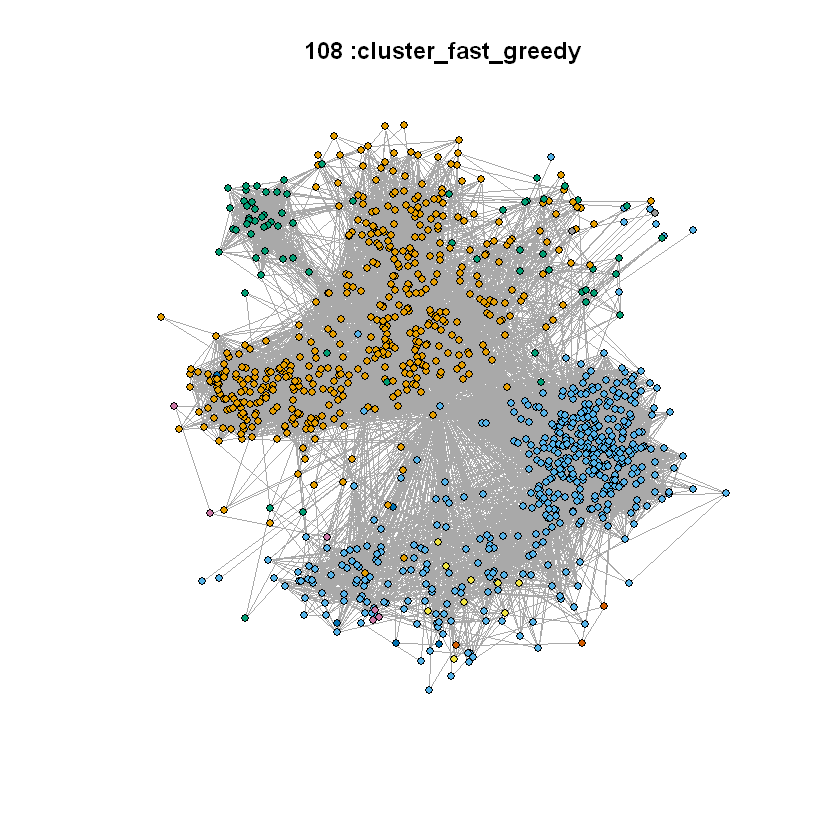

[1] 0.5067549


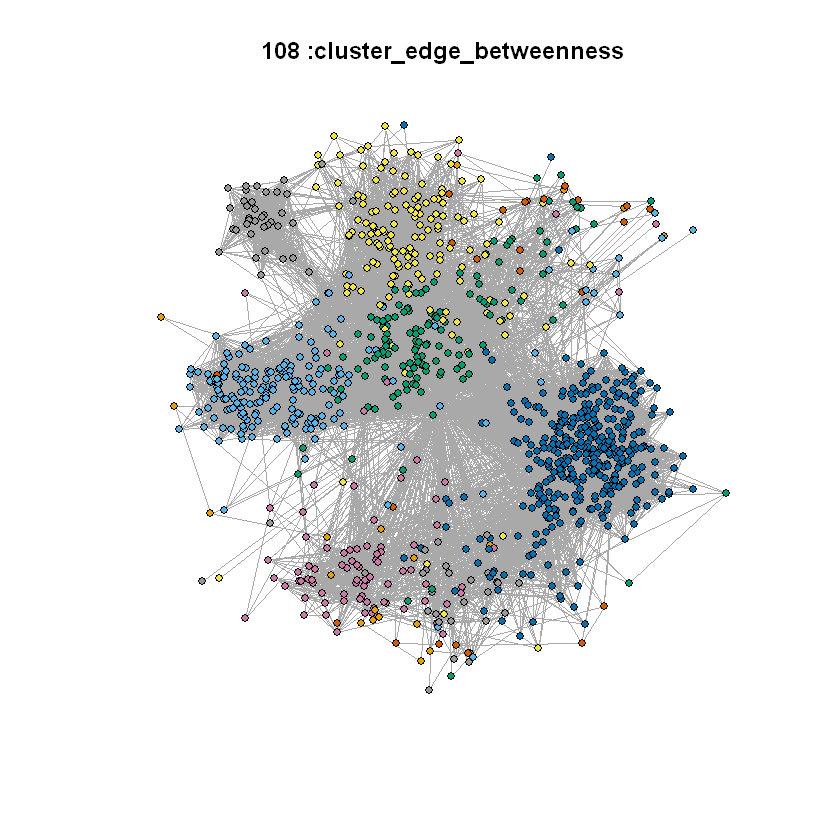

[1] 0.5082492


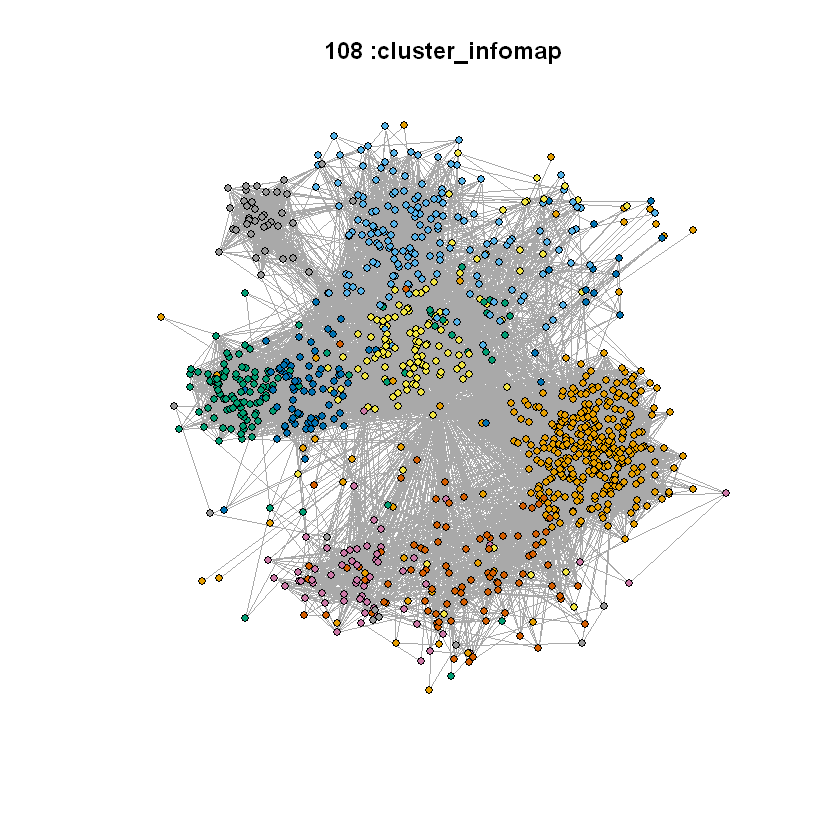

In [21]:
node <- nodes_pool[2]
eg <- make_ego_graph(g, order=1, nodes=node, mode="all")[[1]]
eg_coords <- layout_with_fr(eg)
eg_no_edges <- delete_edges(eg, E(eg))

eg_com1 <- cluster_fast_greedy(eg)
plot(eg, vertex.size=3, vertex.label=NA, vertex.color=membership(eg_com1), 
     layout=eg_coords, main=paste(node,':cluster_fast_greedy'))
print(modularity(eg_com1))


eg_com2 <- cluster_edge_betweenness(eg)
plot(eg,vertex.size=3, vertex.label=NA, 
     vertex.color=membership(eg_com2), 
     layout=eg_coords, main=paste(node,':cluster_edge_betweenness'))
print(modularity(eg_com2))

eg_com3 <- cluster_infomap(eg)
plot(eg,vertex.size=3, vertex.label=NA, 
     vertex.color=membership(eg_com3), 
     layout=eg_coords, main=paste(node,':cluster_infomap'))
print(modularity(eg_com3))

[1] 0.2517149


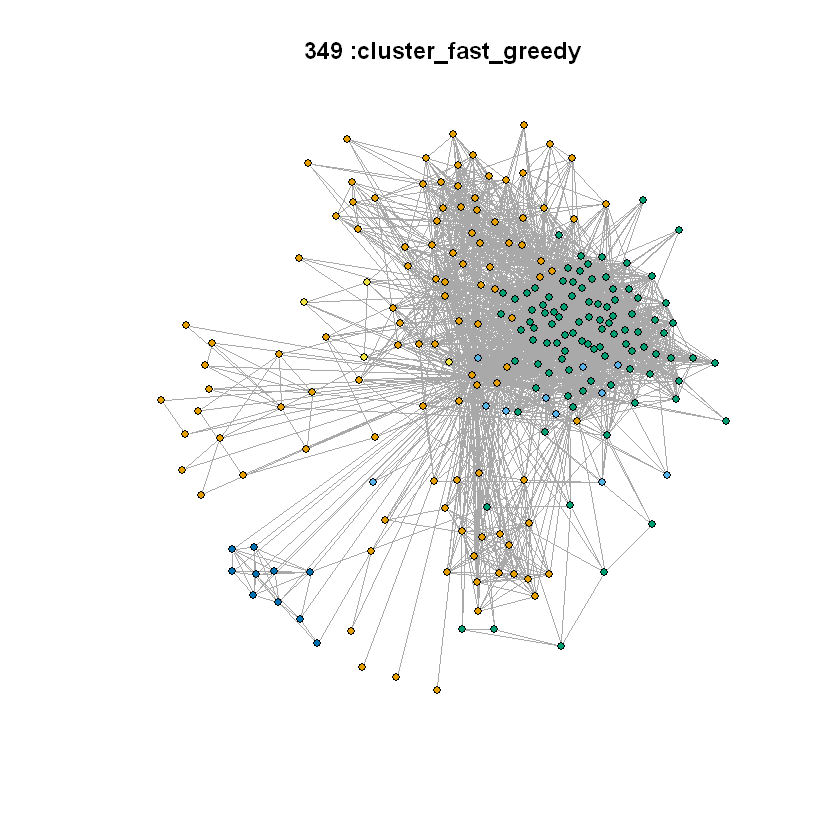

[1] 0.133528


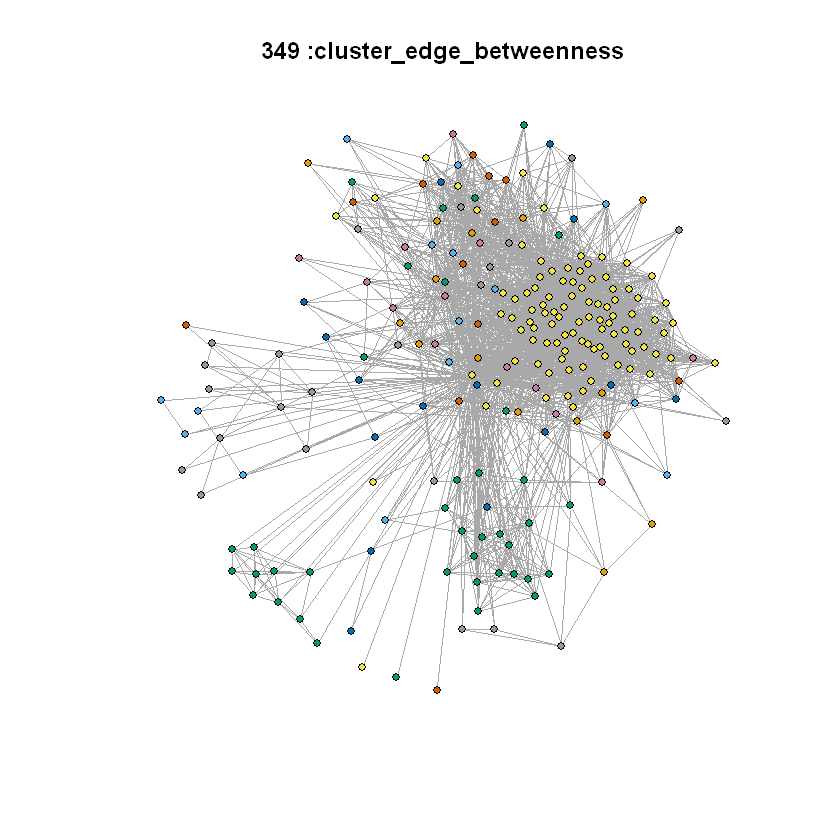

[1] 0.0954642


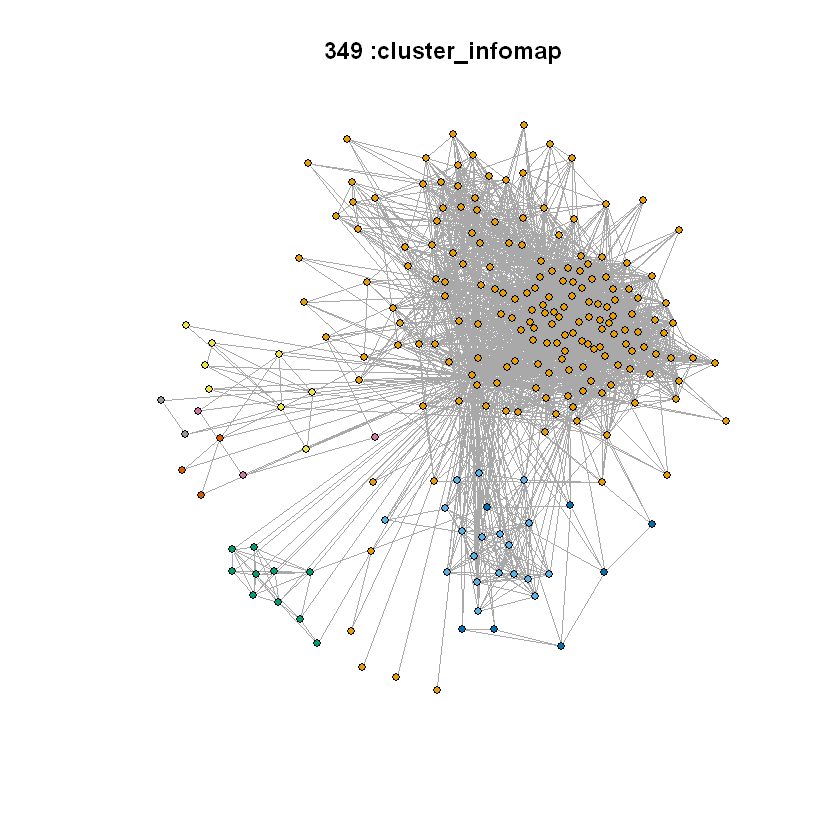

In [18]:
node <- nodes_pool[3]
eg <- make_ego_graph(g, order=1, nodes=node, mode="all")[[1]]
eg_coords <- layout_with_fr(eg)
eg_no_edges <- delete_edges(eg, E(eg))

eg_com1 <- cluster_fast_greedy(eg)
plot(eg, vertex.size=3, vertex.label=NA, vertex.color=membership(eg_com1), 
     layout=eg_coords, main=paste(node,':cluster_fast_greedy'))
print(modularity(eg_com1))


eg_com2 <- cluster_edge_betweenness(eg)
plot(eg,vertex.size=3, vertex.label=NA, 
     vertex.color=membership(eg_com2), 
     layout=eg_coords, main=paste(node,':cluster_edge_betweenness'))
print(modularity(eg_com2))

eg_com3 <- cluster_infomap(eg)
plot(eg,vertex.size=3, vertex.label=NA, 
     vertex.color=membership(eg_com3), 
     layout=eg_coords, main=paste(node,':cluster_infomap'))
print(modularity(eg_com3))

[1] 0.5070016


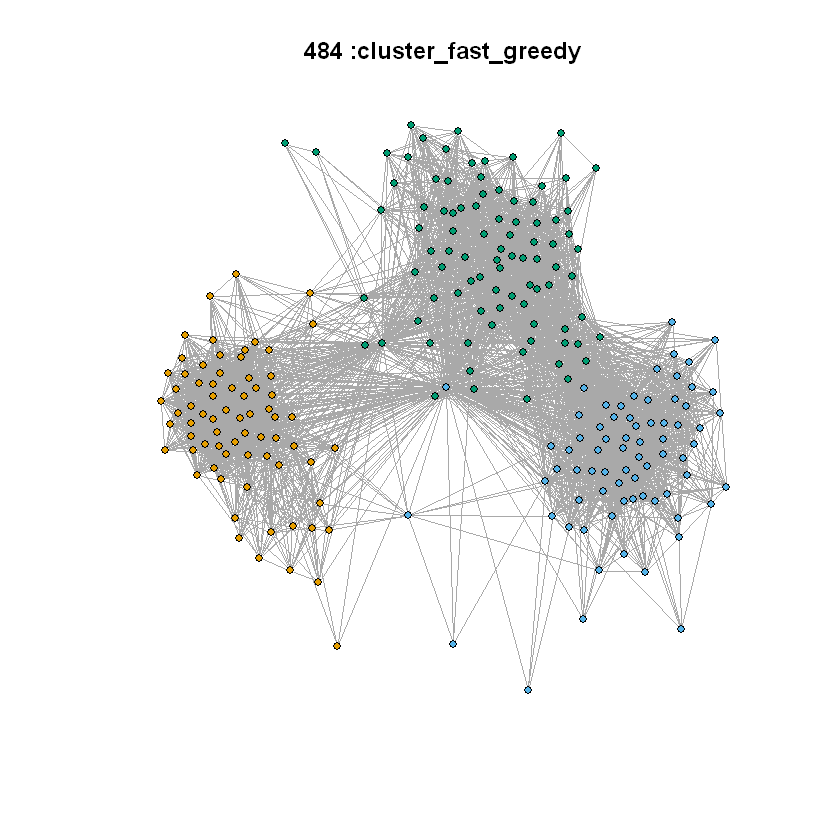

[1] 0.4890952


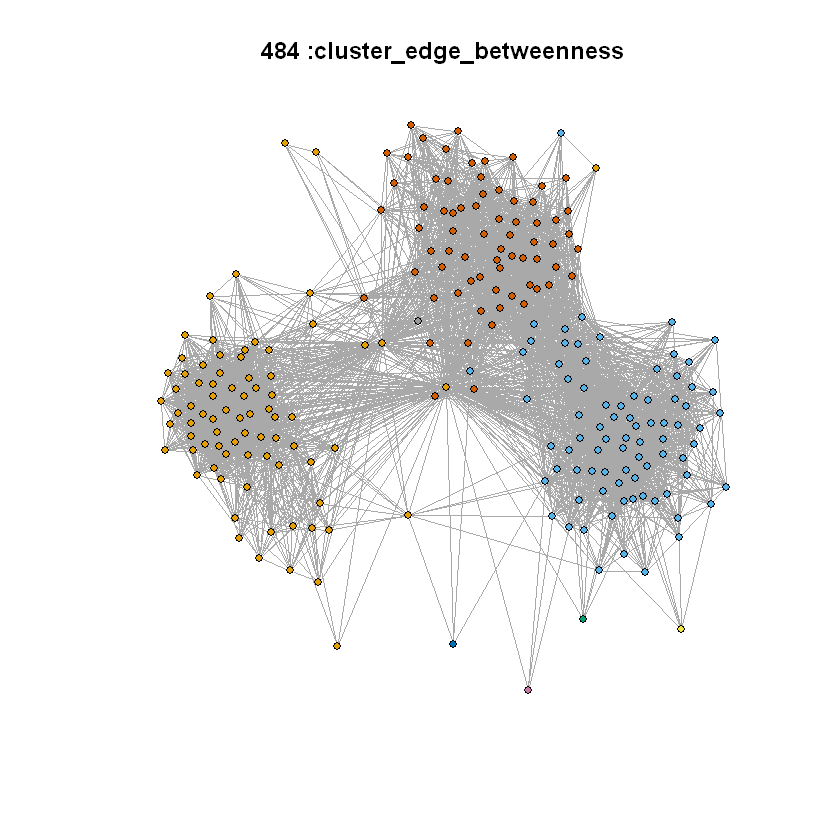

[1] 0.5152788


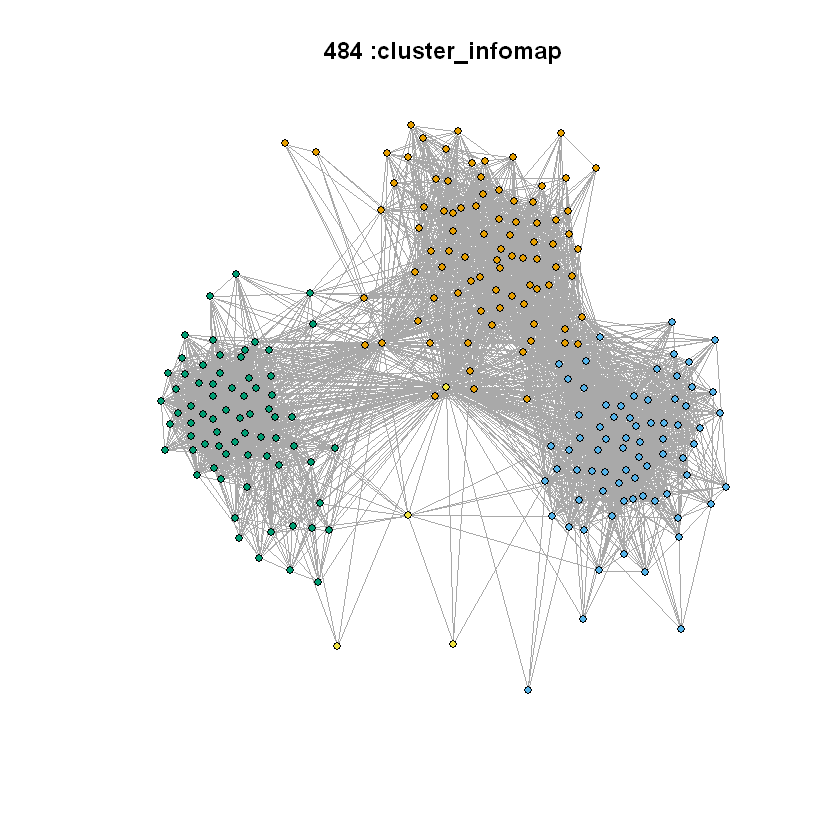

In [19]:
node <- nodes_pool[4]
eg <- make_ego_graph(g, order=1, nodes=node, mode="all")[[1]]
eg_coords <- layout_with_fr(eg)
eg_no_edges <- delete_edges(eg, E(eg))

eg_com1 <- cluster_fast_greedy(eg)
plot(eg, vertex.size=3, vertex.label=NA, vertex.color=membership(eg_com1), 
     layout=eg_coords, main=paste(node,':cluster_fast_greedy'))
print(modularity(eg_com1))


eg_com2 <- cluster_edge_betweenness(eg)
plot(eg,vertex.size=3, vertex.label=NA, 
     vertex.color=membership(eg_com2), 
     layout=eg_coords, main=paste(node,':cluster_edge_betweenness'))
print(modularity(eg_com2))

eg_com3 <- cluster_infomap(eg)
plot(eg,vertex.size=3, vertex.label=NA, 
     vertex.color=membership(eg_com3), 
     layout=eg_coords, main=paste(node,':cluster_infomap'))
print(modularity(eg_com3))

[1] 0.1455315


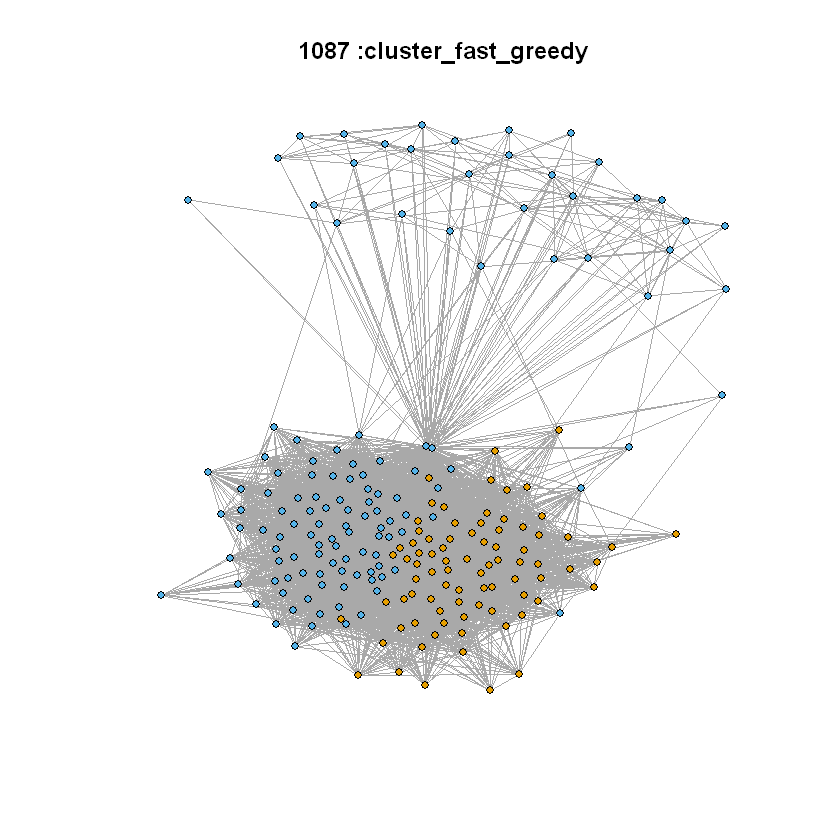

[1] 0.02762377


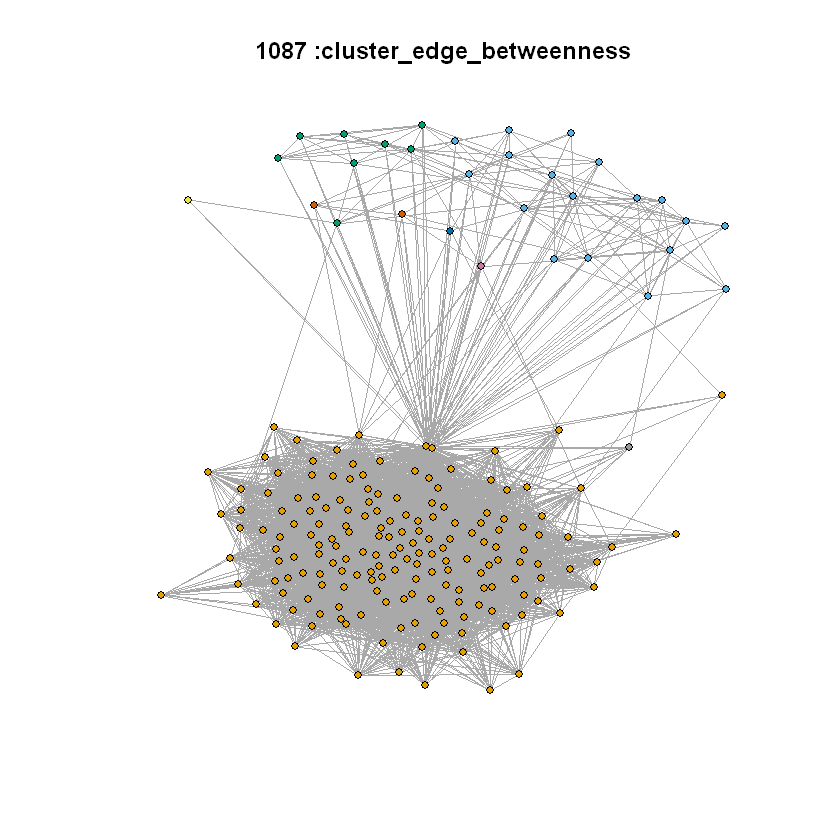

[1] 0.02690662


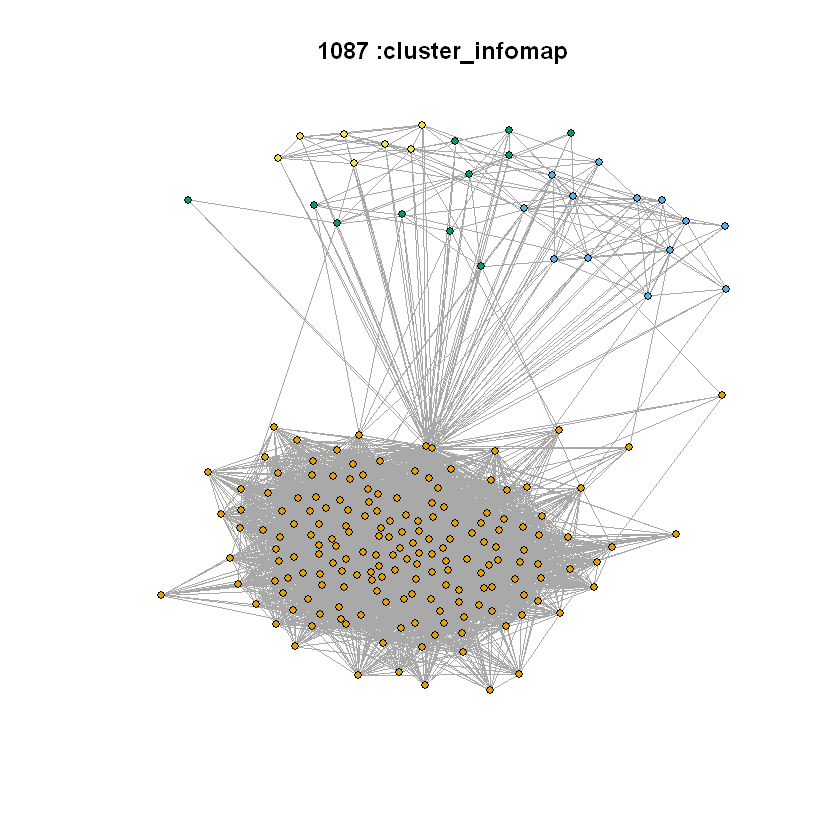

In [20]:
node <- nodes_pool[5]
eg <- make_ego_graph(g, order=1, nodes=node, mode="all")[[1]]
eg_coords <- layout_with_fr(eg)
eg_no_edges <- delete_edges(eg, E(eg))

eg_com1 <- cluster_fast_greedy(eg)
plot(eg, vertex.size=3, vertex.label=NA, vertex.color=membership(eg_com1), 
     layout=eg_coords, main=paste(node,':cluster_fast_greedy'))
print(modularity(eg_com1))


eg_com2 <- cluster_edge_betweenness(eg)
plot(eg,vertex.size=3, vertex.label=NA, 
     vertex.color=membership(eg_com2), 
     layout=eg_coords, main=paste(node,':cluster_edge_betweenness'))
print(modularity(eg_com2))

eg_com3 <- cluster_infomap(eg)
plot(eg,vertex.size=3, vertex.label=NA, 
     vertex.color=membership(eg_com3), 
     layout=eg_coords, main=paste(node,':cluster_infomap'))
print(modularity(eg_com3))

### 1_3 Question 10

[1] 0.4418533


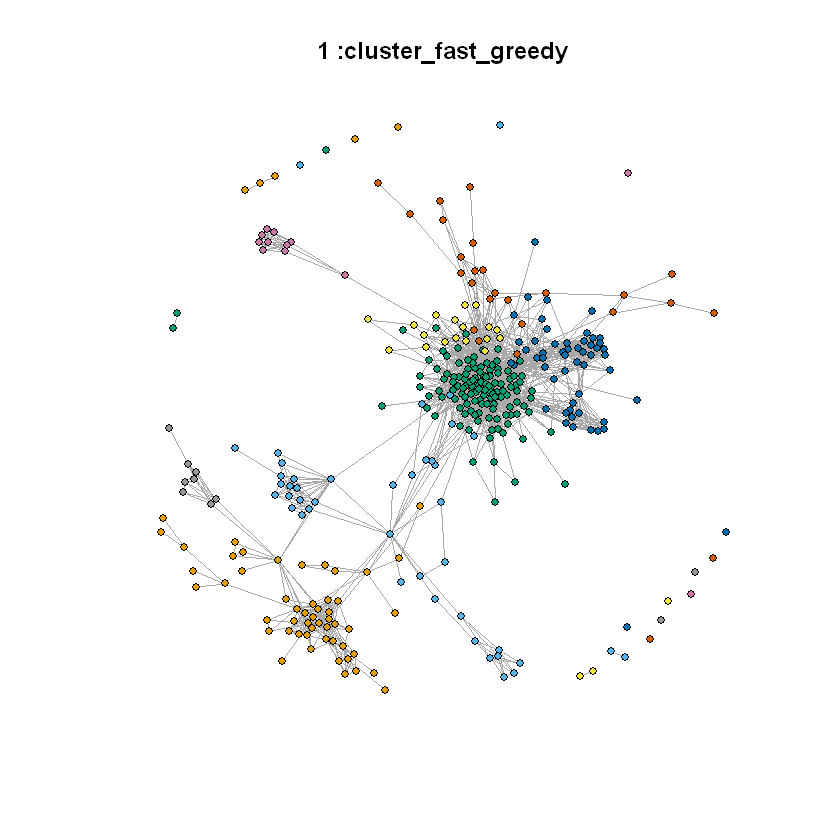

[1] 0.4161461


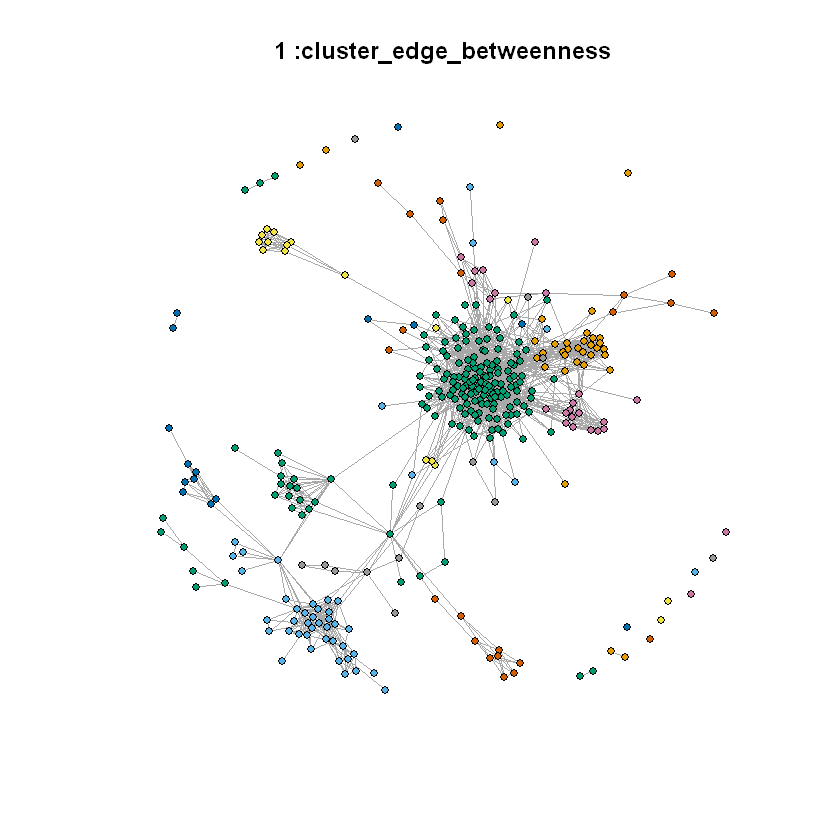

[1] 0.4180077


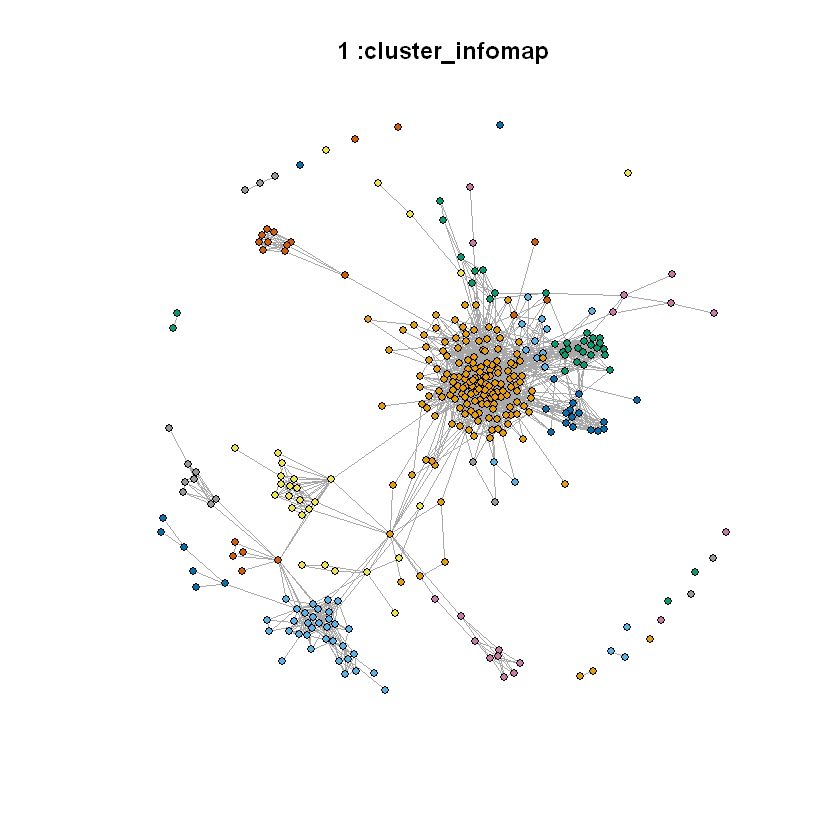

In [33]:
node <- nodes_pool[1]
eg <- make_ego_graph(g, order=1, nodes=node, mode="all")[[1]]
eg <- delete_vertices(eg, 1)

eg_coords <- layout_with_fr(eg)
eg_no_edges <- delete_edges(eg, E(eg))

eg_com1 <- cluster_fast_greedy(eg)
plot(eg, vertex.size=3, vertex.label=NA, vertex.color=membership(eg_com1), 
     layout=eg_coords, main=paste(node,':cluster_fast_greedy'))
print(modularity(eg_com1))


eg_com2 <- cluster_edge_betweenness(eg)
plot(eg,vertex.size=3, vertex.label=NA, 
     vertex.color=membership(eg_com2), 
     layout=eg_coords, main=paste(node,':cluster_edge_betweenness'))
print(modularity(eg_com2))

eg_com3 <- cluster_infomap(eg)
plot(eg,vertex.size=3, vertex.label=NA, 
     vertex.color=membership(eg_com3), 
     layout=eg_coords, main=paste(node,':cluster_infomap'))
print(modularity(eg_com3))

[1] 0.4359515


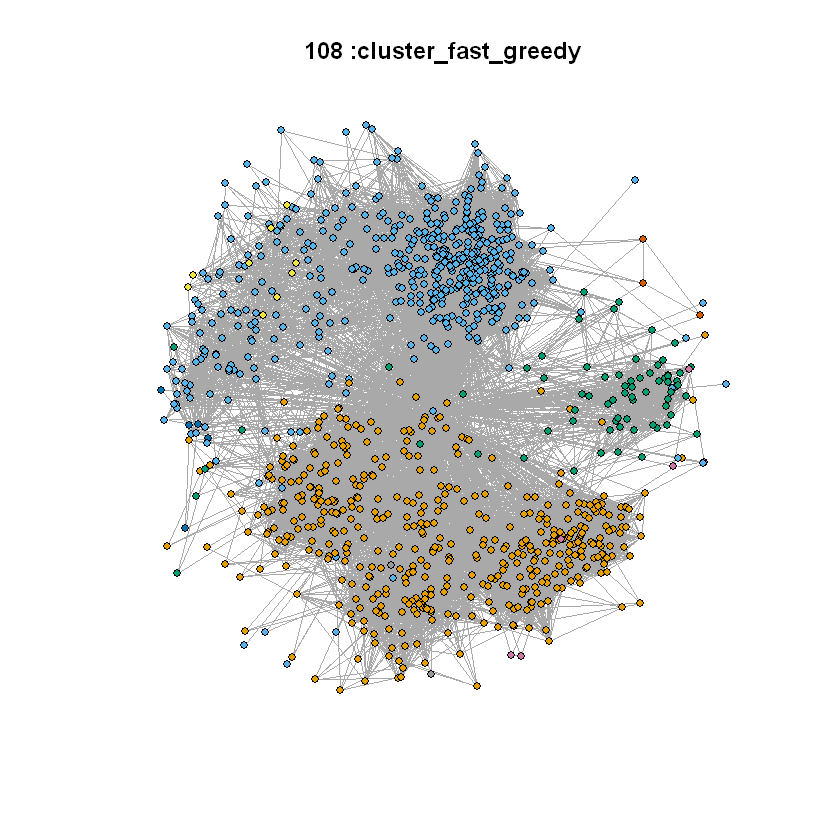

[1] 0.5056361


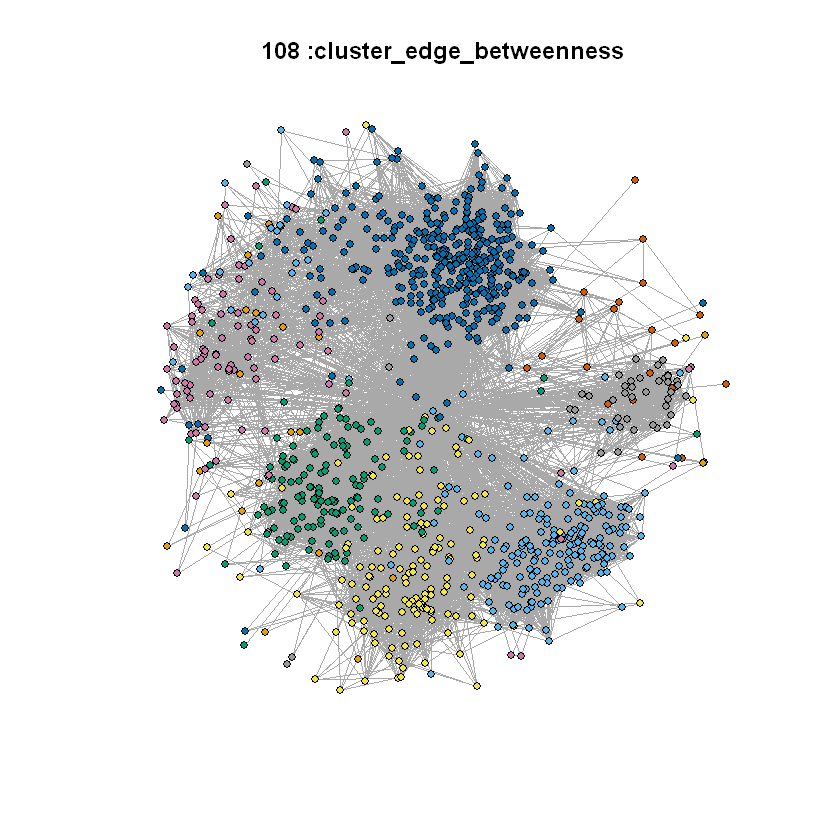

[1] 0.5081681


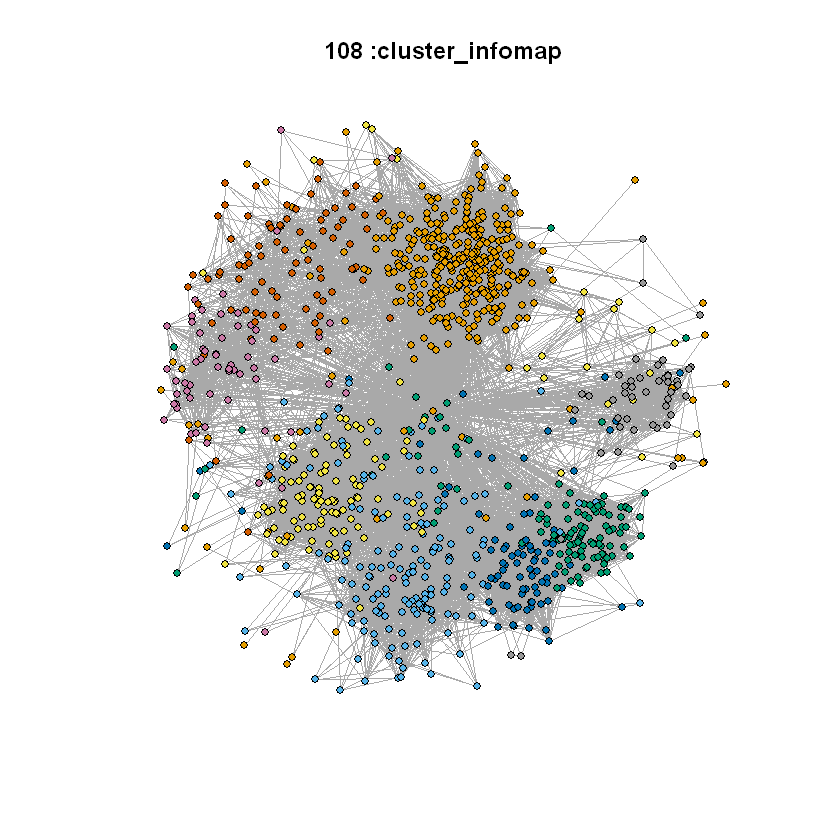

In [34]:
node <- nodes_pool[2]
eg <- make_ego_graph(g, order=1, nodes=node, mode="all")[[1]]
eg <- delete_vertices(eg, 1)

eg_coords <- layout_with_fr(eg)
eg_no_edges <- delete_edges(eg, E(eg))

eg_com1 <- cluster_fast_greedy(eg)
plot(eg, vertex.size=3, vertex.label=NA, vertex.color=membership(eg_com1), 
     layout=eg_coords, main=paste(node,':cluster_fast_greedy'))
print(modularity(eg_com1))


eg_com2 <- cluster_edge_betweenness(eg)
plot(eg,vertex.size=3, vertex.label=NA, 
     vertex.color=membership(eg_com2), 
     layout=eg_coords, main=paste(node,':cluster_edge_betweenness'))
print(modularity(eg_com2))

eg_com3 <- cluster_infomap(eg)
plot(eg,vertex.size=3, vertex.label=NA, 
     vertex.color=membership(eg_com3), 
     layout=eg_coords, main=paste(node,':cluster_infomap'))
print(modularity(eg_com3))

[1] 0.257489


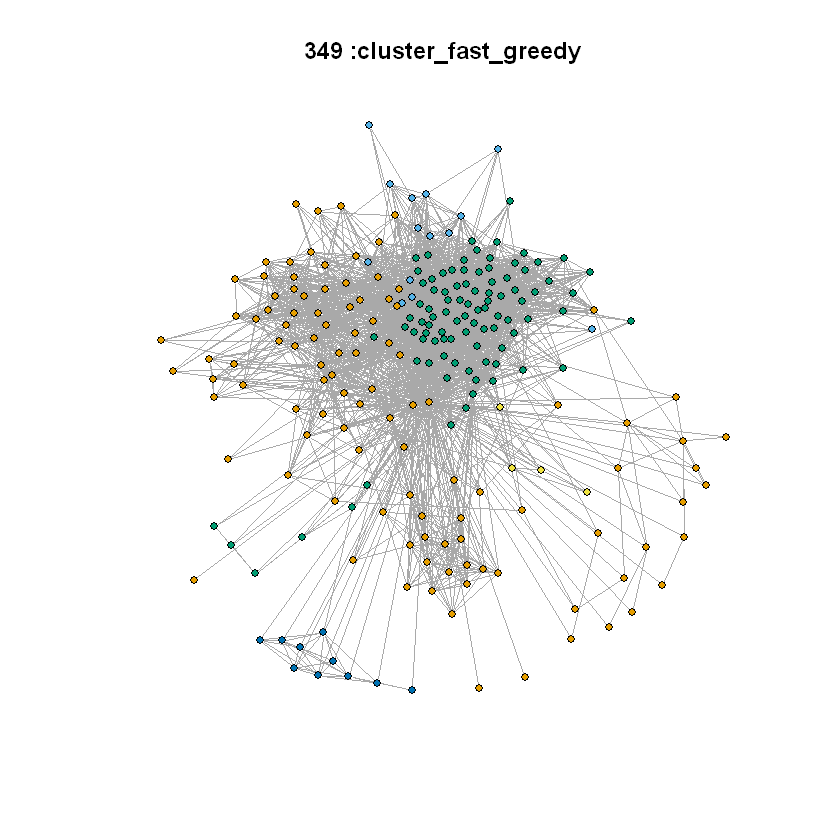

[1] 0.1337295


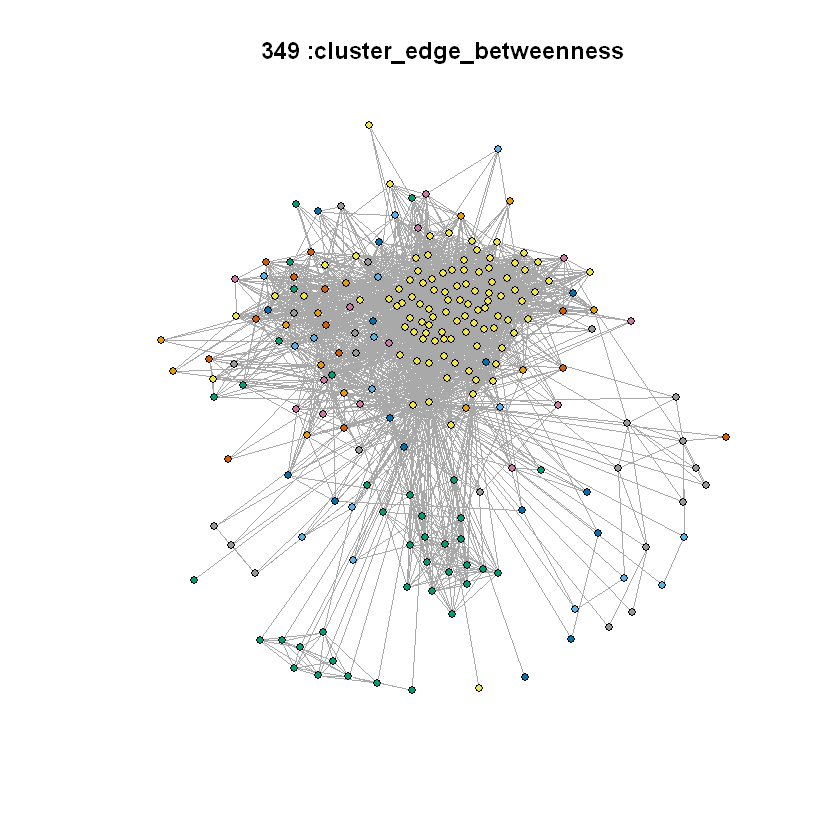

[1] 0.09509536


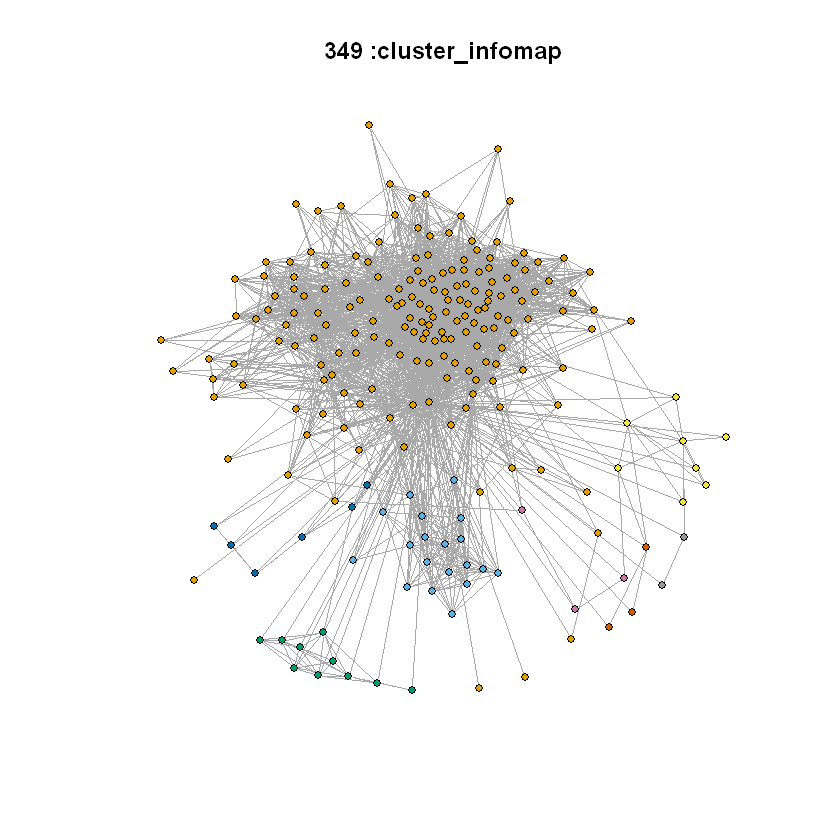

In [35]:
node <- nodes_pool[3]
eg <- make_ego_graph(g, order=1, nodes=node, mode="all")[[1]]
eg <- delete_vertices(eg, 1)

eg_coords <- layout_with_fr(eg)
eg_no_edges <- delete_edges(eg, E(eg))

eg_com1 <- cluster_fast_greedy(eg)
plot(eg, vertex.size=3, vertex.label=NA, vertex.color=membership(eg_com1), 
     layout=eg_coords, main=paste(node,':cluster_fast_greedy'))
print(modularity(eg_com1))


eg_com2 <- cluster_edge_betweenness(eg)
plot(eg,vertex.size=3, vertex.label=NA, 
     vertex.color=membership(eg_com2), 
     layout=eg_coords, main=paste(node,':cluster_edge_betweenness'))
print(modularity(eg_com2))

eg_com3 <- cluster_infomap(eg)
plot(eg,vertex.size=3, vertex.label=NA, 
     vertex.color=membership(eg_com3), 
     layout=eg_coords, main=paste(node,':cluster_infomap'))
print(modularity(eg_com3))

[1] 0.5211308


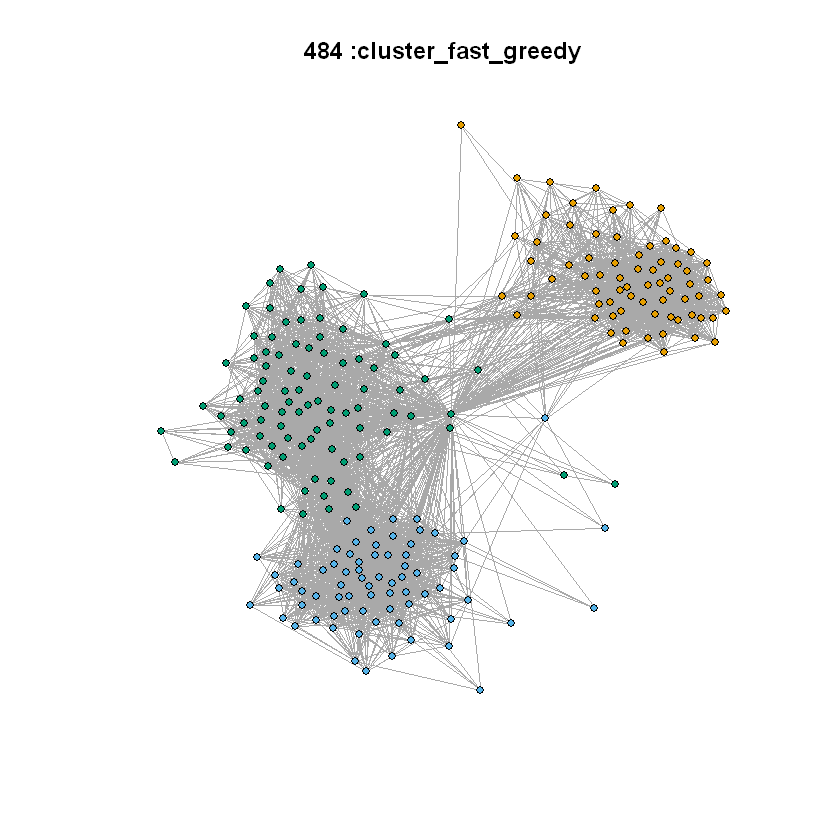

[1] 0.4956171


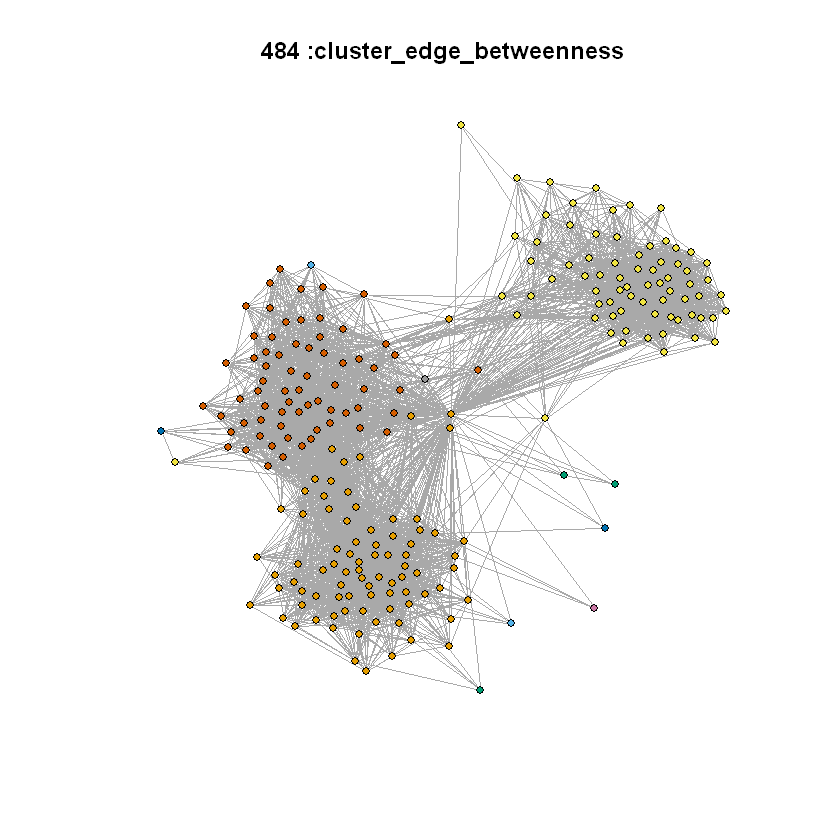

[1] 0.5291475


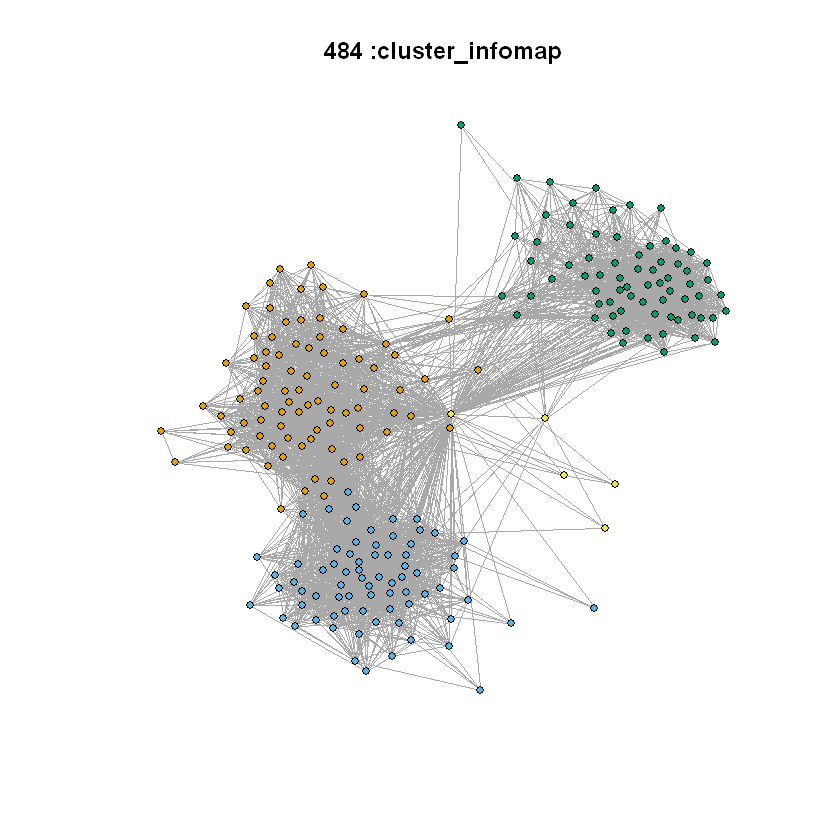

In [36]:
node <- nodes_pool[4]
eg <- make_ego_graph(g, order=1, nodes=node, mode="all")[[1]]
eg <- delete_vertices(eg, 1)

eg_coords <- layout_with_fr(eg)
eg_no_edges <- delete_edges(eg, E(eg))

eg_com1 <- cluster_fast_greedy(eg)
plot(eg, vertex.size=3, vertex.label=NA, vertex.color=membership(eg_com1), 
     layout=eg_coords, main=paste(node,':cluster_fast_greedy'))
print(modularity(eg_com1))


eg_com2 <- cluster_edge_betweenness(eg)
plot(eg,vertex.size=3, vertex.label=NA, 
     vertex.color=membership(eg_com2), 
     layout=eg_coords, main=paste(node,':cluster_edge_betweenness'))
print(modularity(eg_com2))

eg_com3 <- cluster_infomap(eg)
plot(eg,vertex.size=3, vertex.label=NA, 
     vertex.color=membership(eg_com3), 
     layout=eg_coords, main=paste(node,':cluster_infomap'))
print(modularity(eg_com3))

[1] 0.1481956


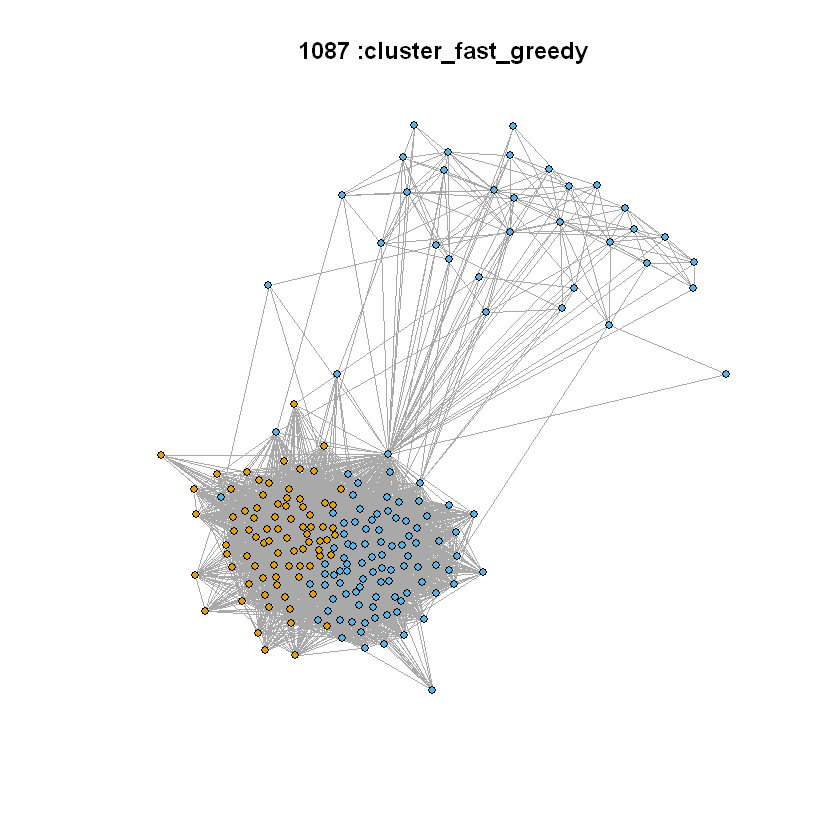

[1] 0.0324953


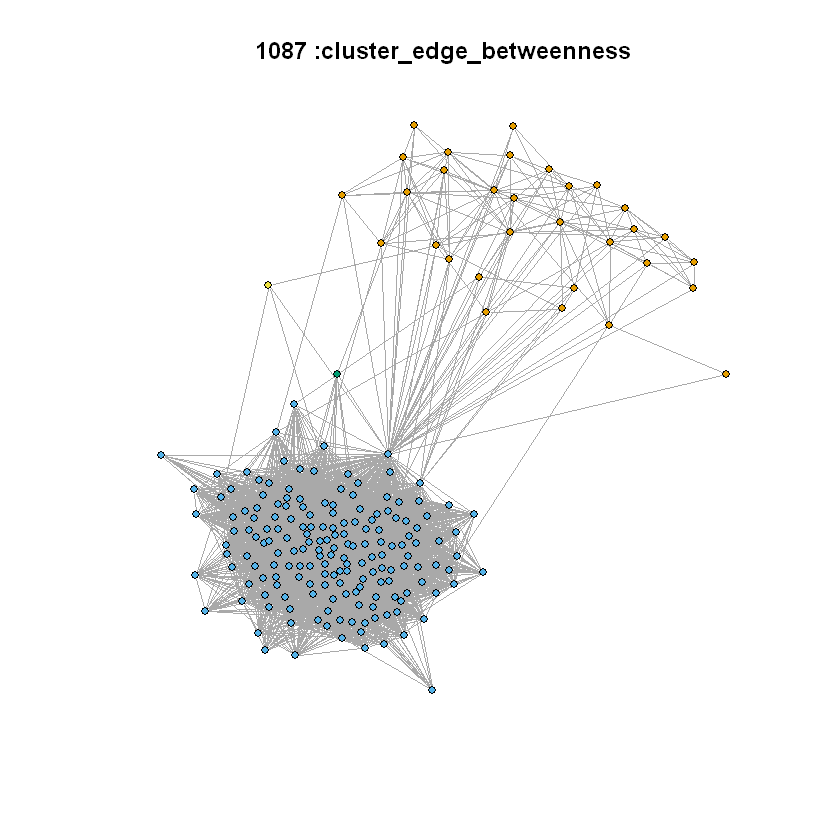

[1] 0.02737159


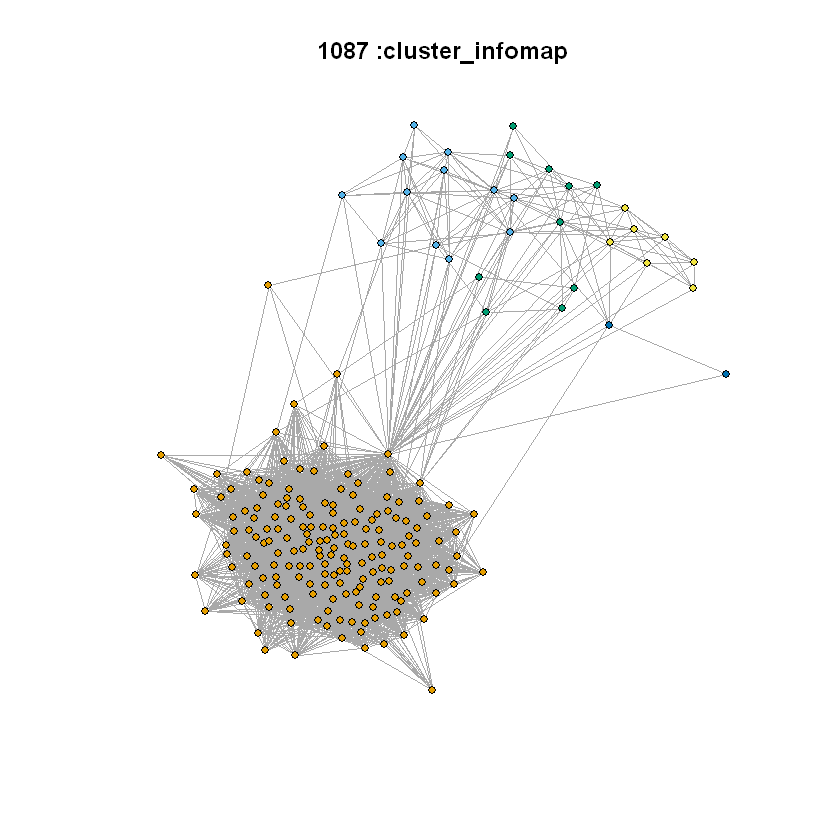

In [43]:
node <- nodes_pool[5]
eg <- make_ego_graph(g, order=1, nodes=node, mode="all")[[1]]
eg <- delete_vertices(eg, 1)

eg_coords <- layout_with_fr(eg)
eg_no_edges <- delete_edges(eg, E(eg))

eg_com1 <- cluster_fast_greedy(eg)
plot(eg, vertex.size=3, vertex.label=NA, vertex.color=membership(eg_com1), 
     layout=eg_coords, main=paste(node,':cluster_fast_greedy'))
print(modularity(eg_com1))


eg_com2 <- cluster_edge_betweenness(eg)
plot(eg,vertex.size=3, vertex.label=NA, 
     vertex.color=membership(eg_com2), 
     layout=eg_coords, main=paste(node,':cluster_edge_betweenness'))
print(modularity(eg_com2))

eg_com3 <- cluster_infomap(eg)
plot(eg,vertex.size=3, vertex.label=NA, 
     vertex.color=membership(eg_com3), 
     layout=eg_coords, main=paste(node,':cluster_infomap'))
print(modularity(eg_com3))

### 1_3 Question 11

### 1_3 Question 12

In [120]:
nodes_pool <- c(1, 108, 349, 484, 1087)

In [88]:
embeddedness <- function(graph,target){
    embed = degree(graph,target, mode = "all")-1
    return(embed)
}

In [114]:
dispersion <- function(graph,core,target){
    mutual_friend = intersection(neighbors(graph,core),neighbors(graph,target))
    sub_graph = induced_subgraph(graph,mutual_friend)
    distances = distances(sub_graph,v = V(sub_graph), to = V(sub_graph))
    distances[is.infinite(distances)]<-0
    return (sum(distances)/2)
}

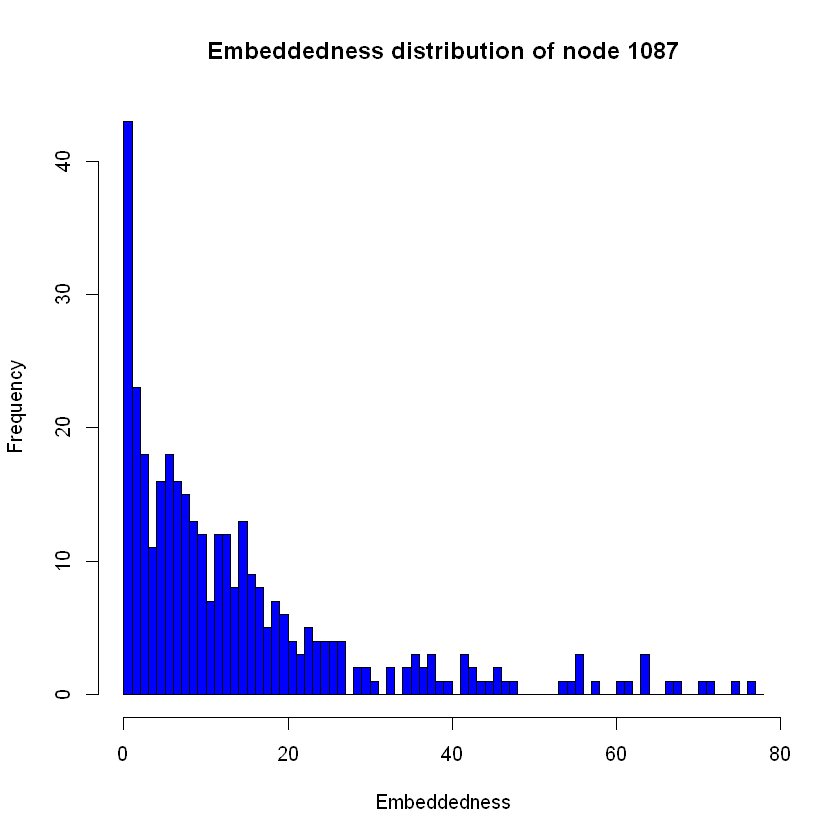

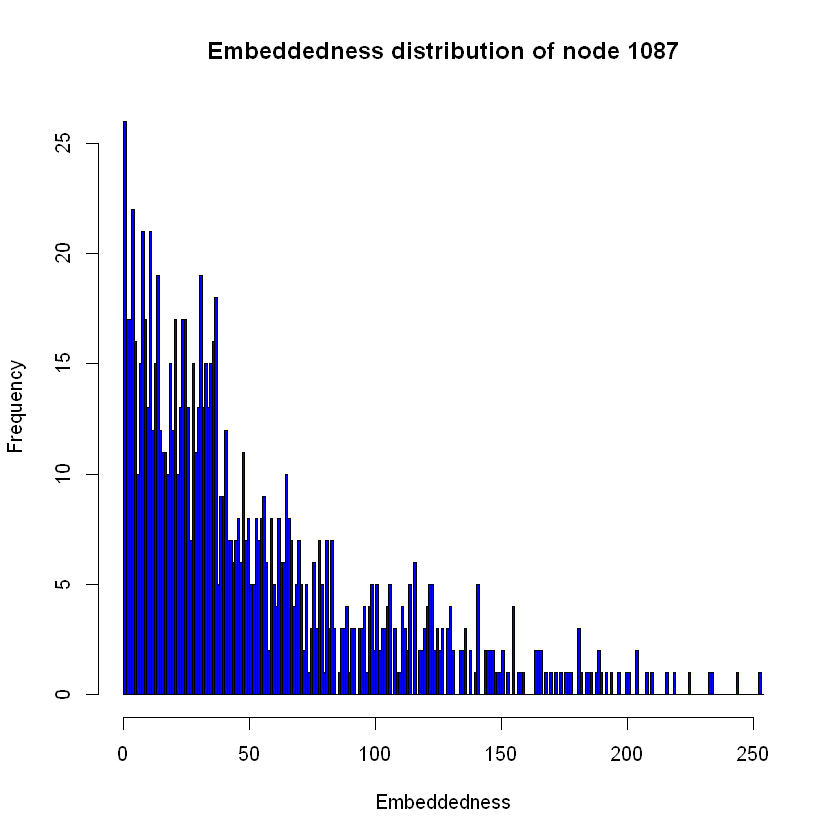

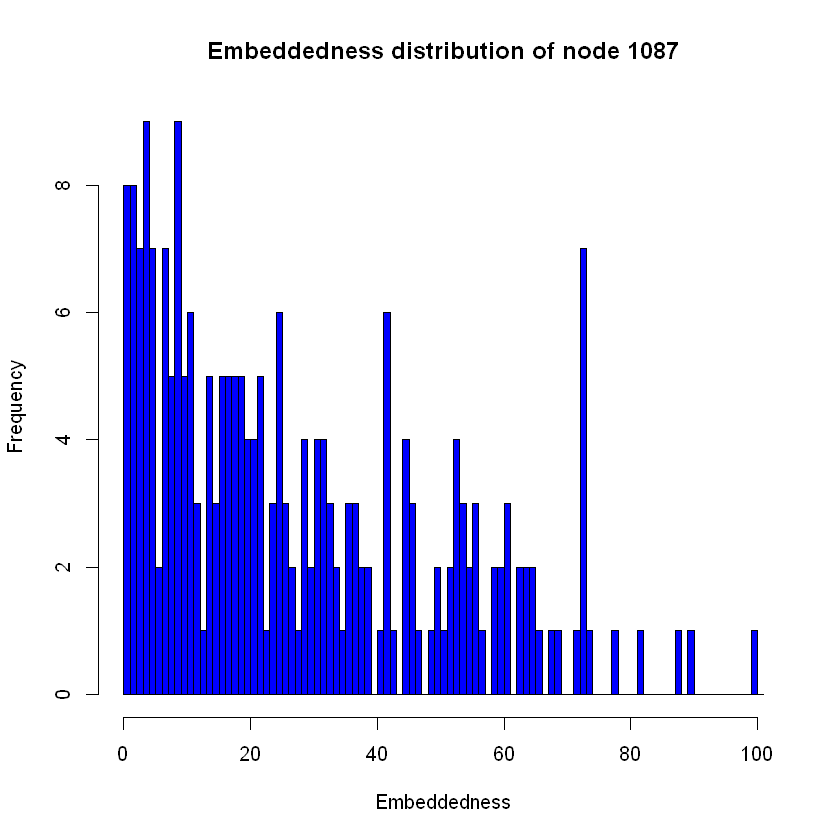

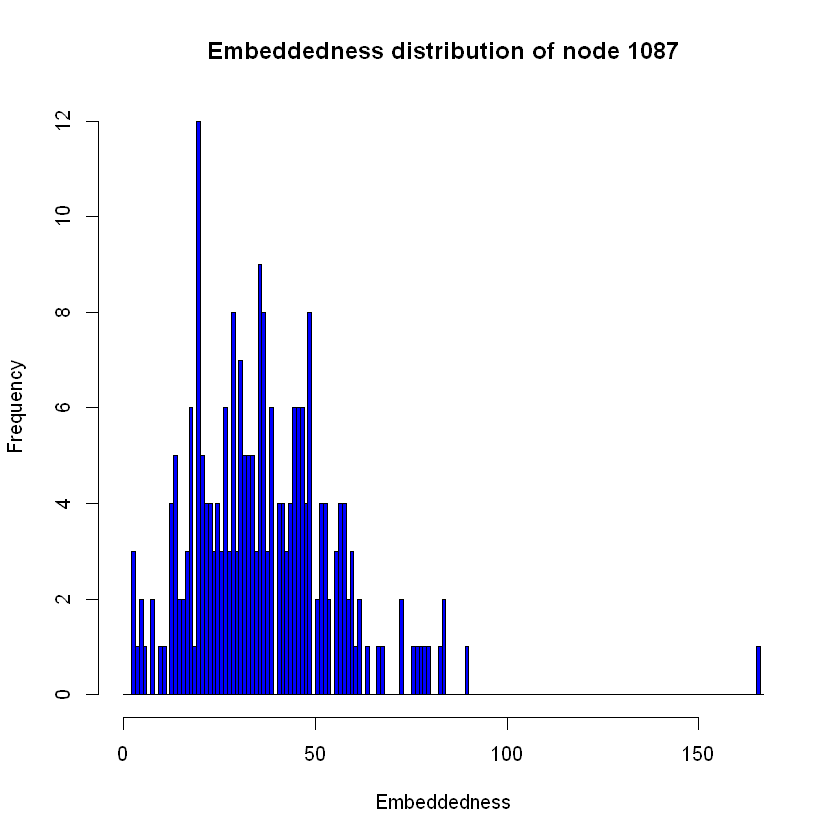

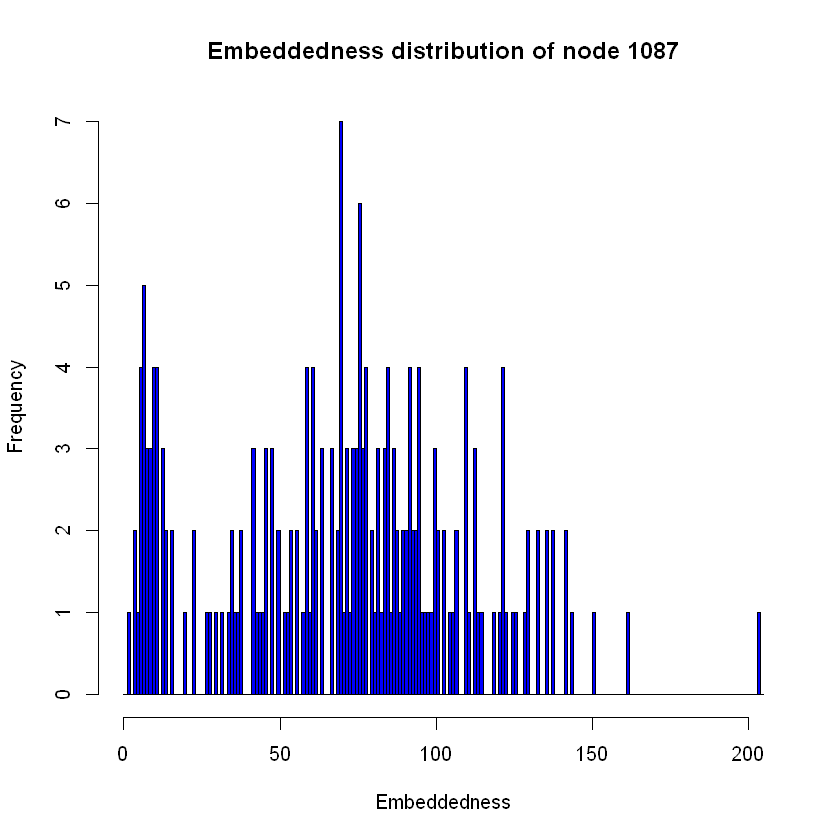

In [174]:
for (core in nodes_pool){
    eg <- make_ego_graph(g, order=1, nodes=core, mode="all")[[1]]
    
    nodes <- neighbors(eg,which.max(degree(eg)))
    embeds <- c()
    for (node in nodes){
        embed <- embeddedness(eg,node)
        embeds <- c(embeds,embed)
    }
    hist(embeds, breaks=seq(0, max(embeds) + 1), col = 'blue',
         main=paste("Embeddedness distribution of node", nodes_pool[i]), 
         xlab="Embeddedness", ylab="Frequency")
}

    
    

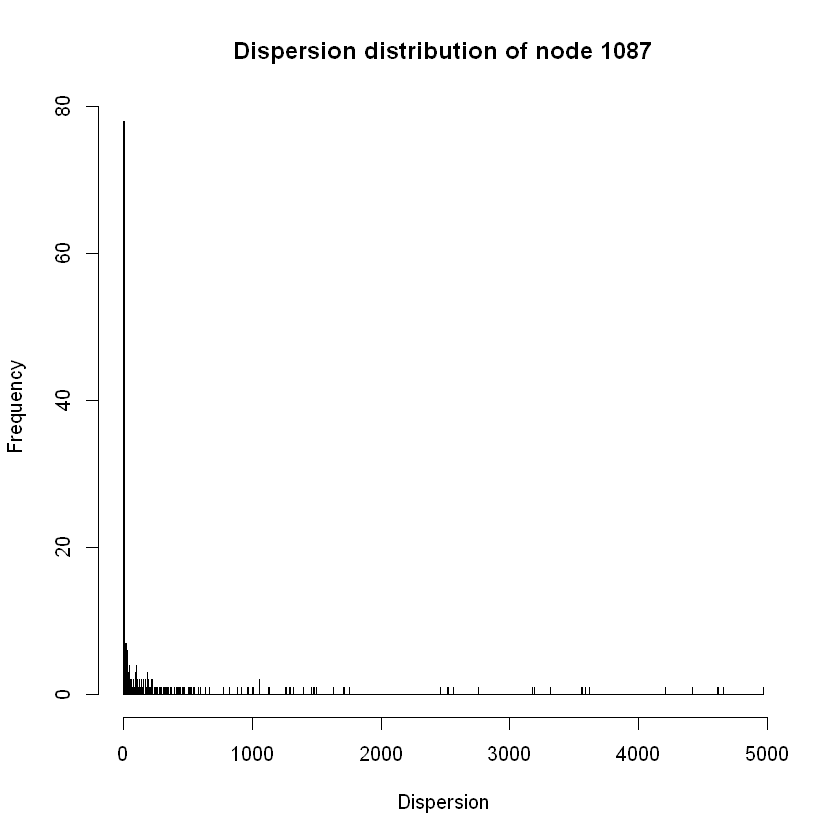

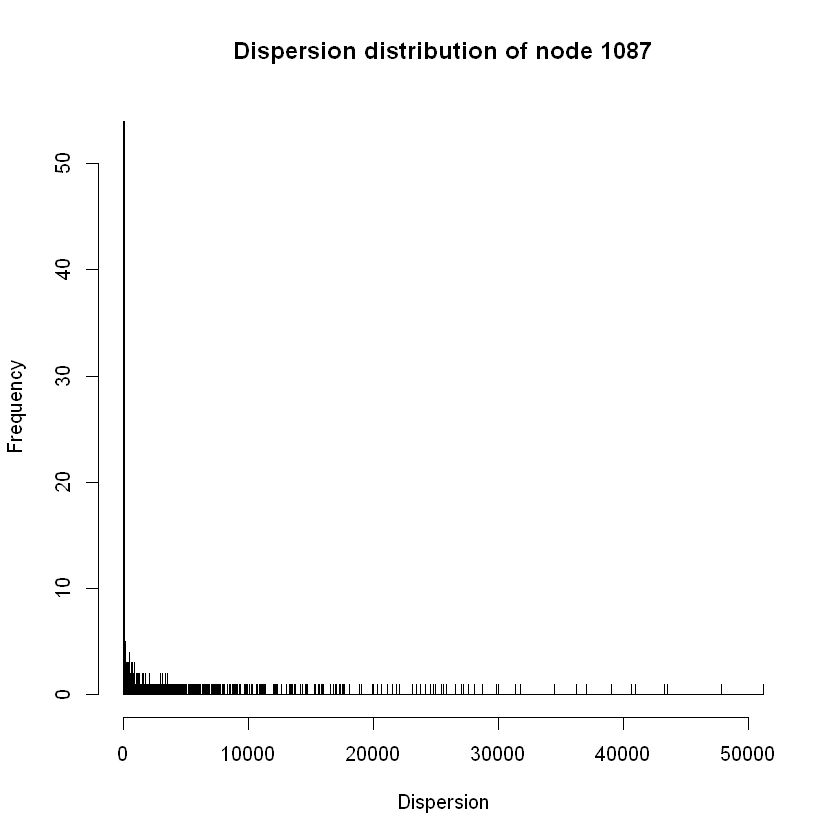

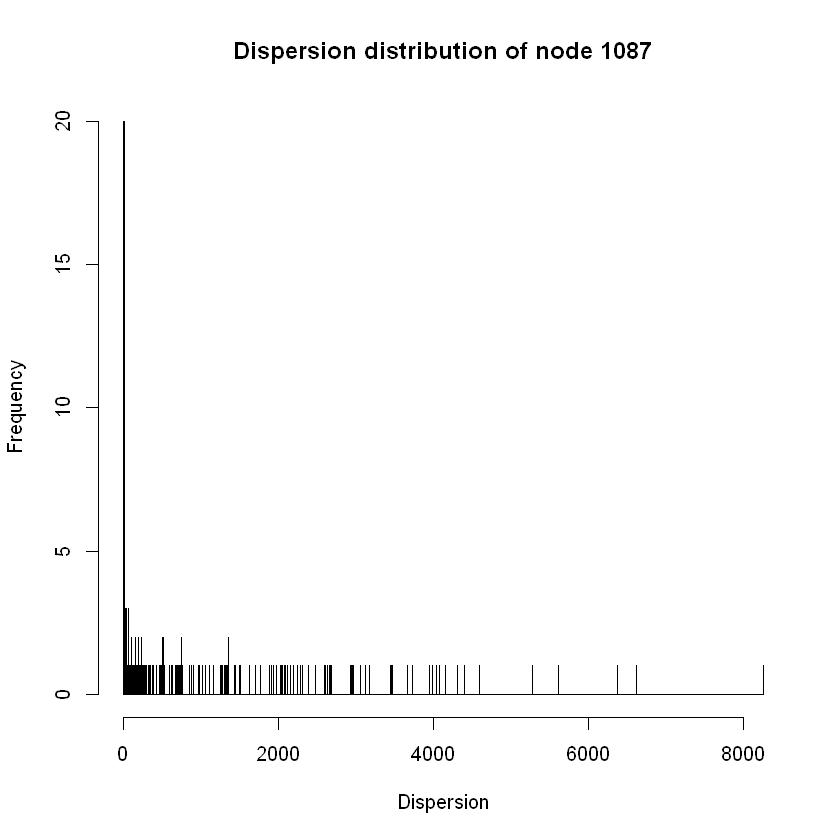

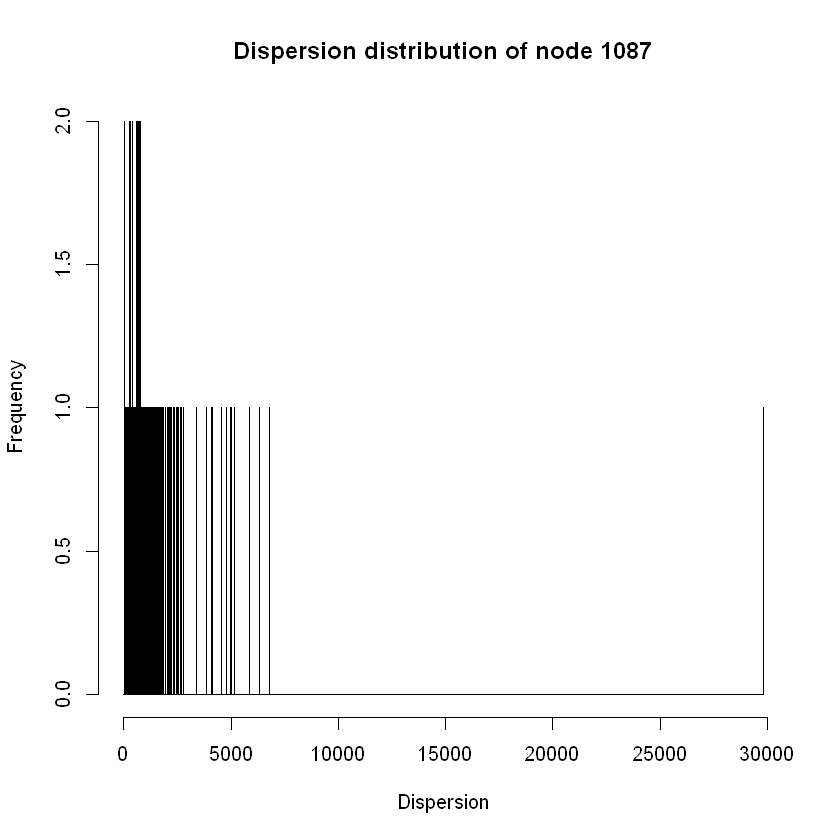

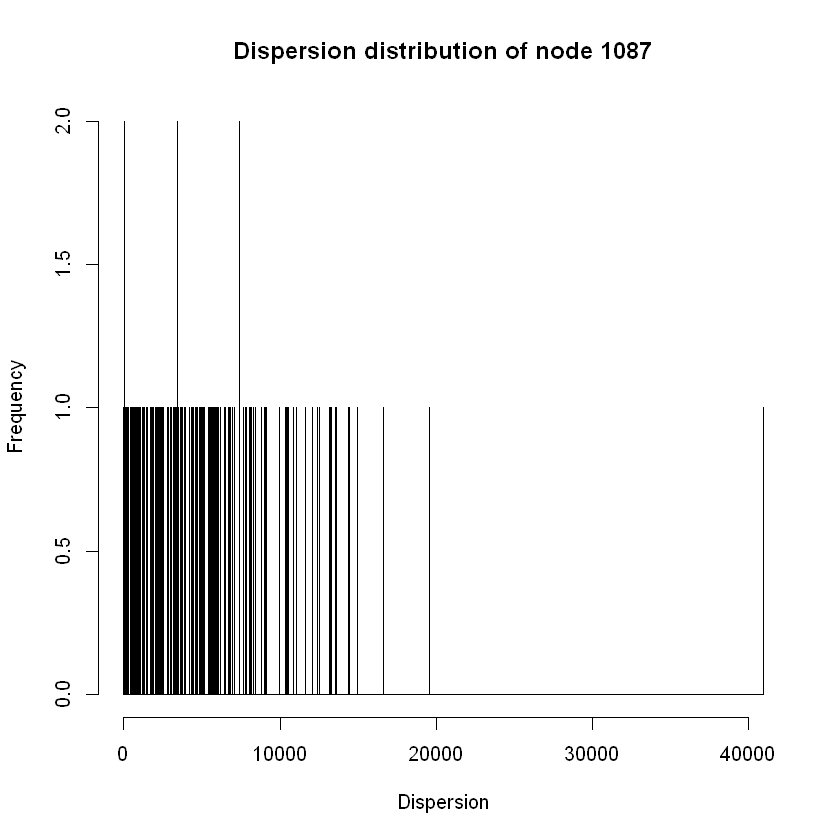

In [176]:
for (core in nodes_pool){
    eg <- make_ego_graph(g, order=1, nodes=core, mode="all")[[1]]
    
    nodes <- neighbors(eg,which.max(degree(eg)))
    dispersions <- c()
    for (node in nodes){
        dp <- dispersion(eg,which.max(degree(eg)),node)
        dispersions <- c(dispersions,dp)
    }
    hist(dispersions, breaks=seq(0, max(dispersions) + 1), col = 'yellow',
         main=paste("Dispersion distribution of node", nodes_pool[i]), 
         xlab="Dispersion", ylab="Frequency")
}


# Question 13

In [239]:
eg <- make_ego_graph(g, order=1, nodes=108, mode="all")
eg[[1]]

IGRAPH 80fb130 U--- 1046 27795 -- 
+ edges from 80fb130:
 [1]  1-- 2  1-- 3  2-- 3  1-- 4  2-- 4  3-- 4  3-- 5  3-- 6  5-- 6  3-- 7
[11]  5-- 7  6-- 7  3-- 8  5-- 8  6-- 8  7-- 8  3-- 9  5-- 9  6-- 9  7-- 9
[21]  8-- 9  3--10  5--10  3--11  5--11  7--11  9--11  3--12  5--12  6--12
[31]  9--12  3--13  5--13  6--13  8--13  9--13 11--13  3--14  5--14  6--14
[41]  7--14  8--14  9--14 11--14 13--14  3--15  5--15  6--15  7--15  8--15
[51]  9--15 11--15 12--15 14--15  3--16  5--16  6--16  7--16  8--16 12--16
[61] 13--16 14--16 15--16  3--17  5--17  6--17  7--17  8--17  9--17 13--17
[71] 14--17 15--17 16--17  3--18  5--18  6--18  7--18  8--18  9--18 13--18
[81] 15--18 16--18 17--18  3--19  5--19  6--19  7--19  8--19  9--19 15--19
+ ... omitted several edges

In [222]:
for (core in nodes_pool){
    eg <- make_ego_graph(g, order=1, nodes=core, mode="all")[[1]]
    
    nodes <- neighbors(eg,which.max(degree(eg)))
    dispersions <- c()
    for (node in nodes){
        dp <- dispersion(eg,which.max(degree(eg)),node)
        dispersions <- c(dispersions,dp)
    }
    print(which.max(dispersions))
    print(dispersions[[which.max(dispersions)]])
}

[1] 56
[1] 4975
[1] 1022
[1] 51252
[1] 32
[1] 8263
[1] 1
[1] 29839
[1] 37
[1] 40969


In [218]:
eg <- make_ego_graph(g, order=1, nodes=1087, mode="all")[[1]]
dispersion(eg,which.max(degree(eg)),38)

ERROR: Error in make_ego_graph(g, order = 1, nodes = 1087, mode = "all")[[2]]: subscript out of bounds



Personalized network of node 1
Node index for max dispersion is 57
Personalized network of node 108
Node index for max dispersion is 1023

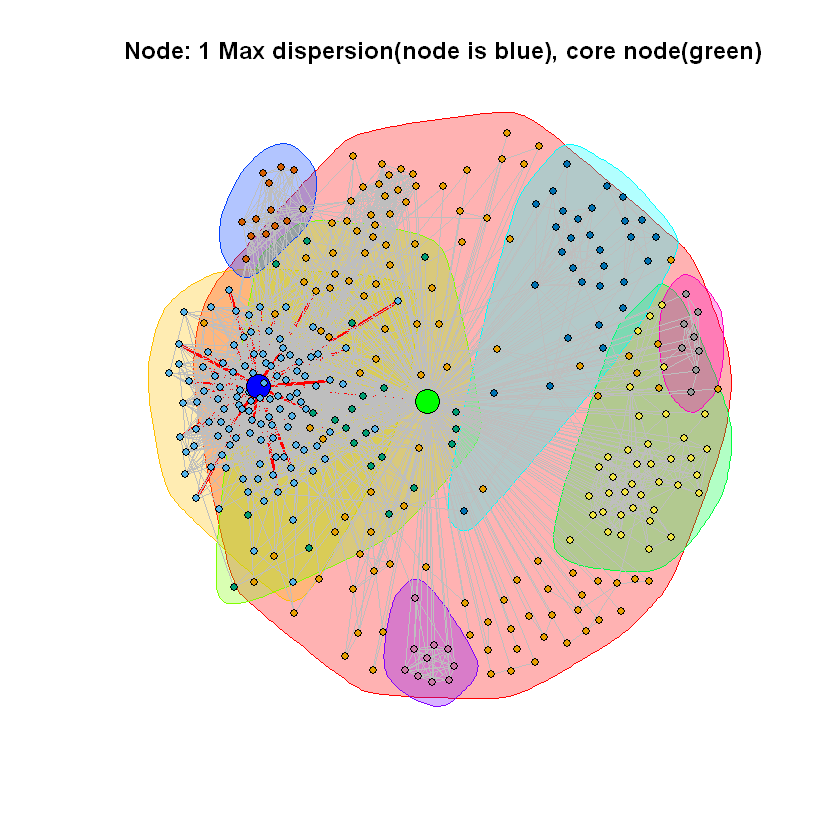


Personalized network of node 349
Node index for max dispersion is 33

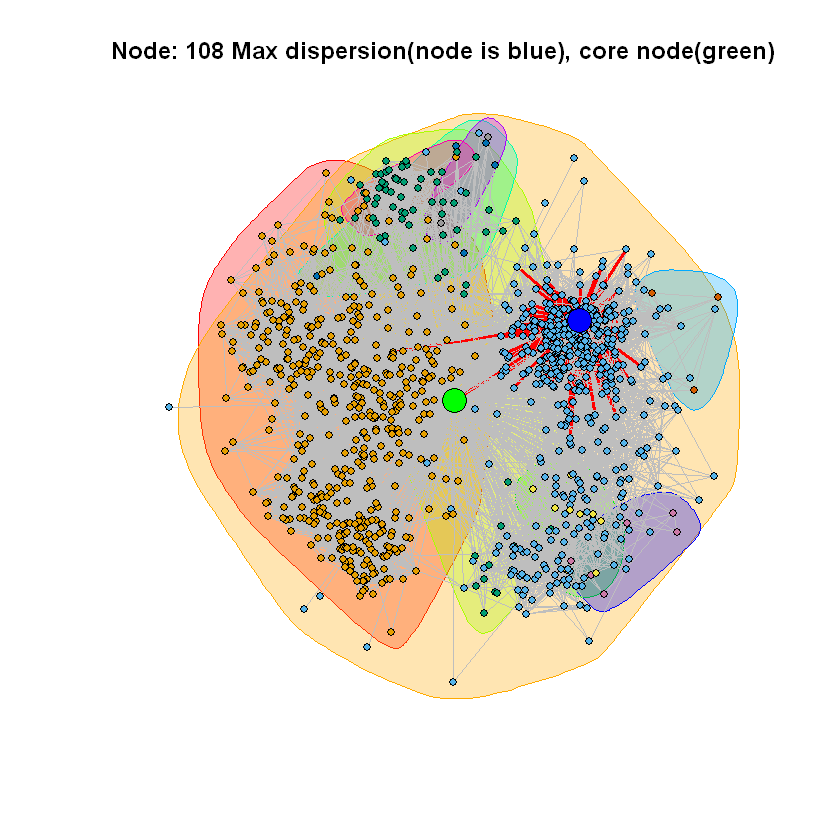


Personalized network of node 484
Node index for max dispersion is 1

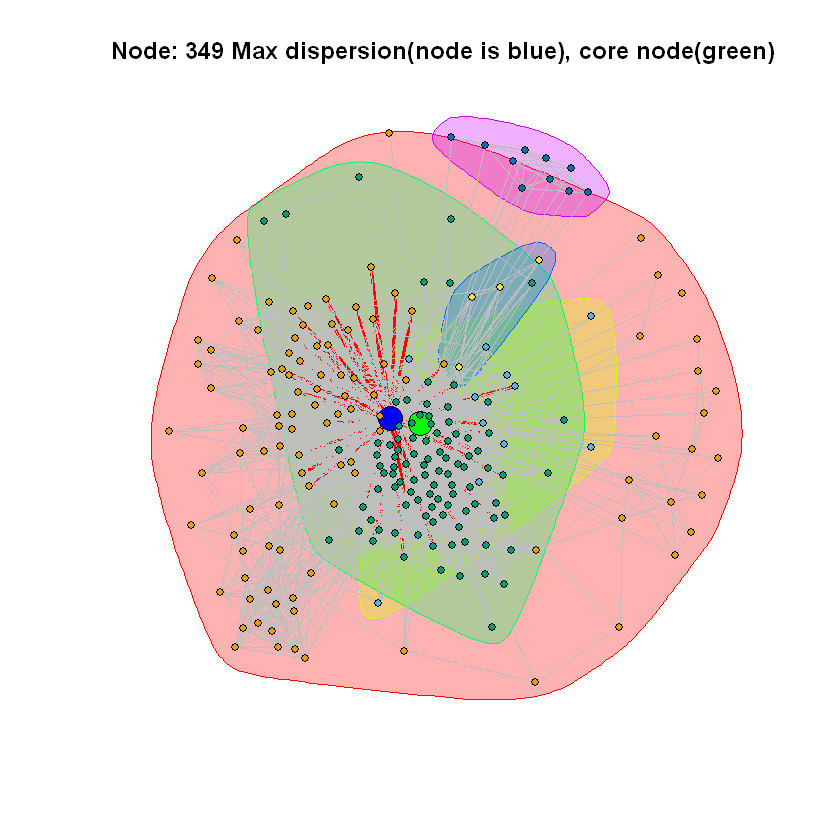


Personalized network of node 1087
Node index for max dispersion is 38

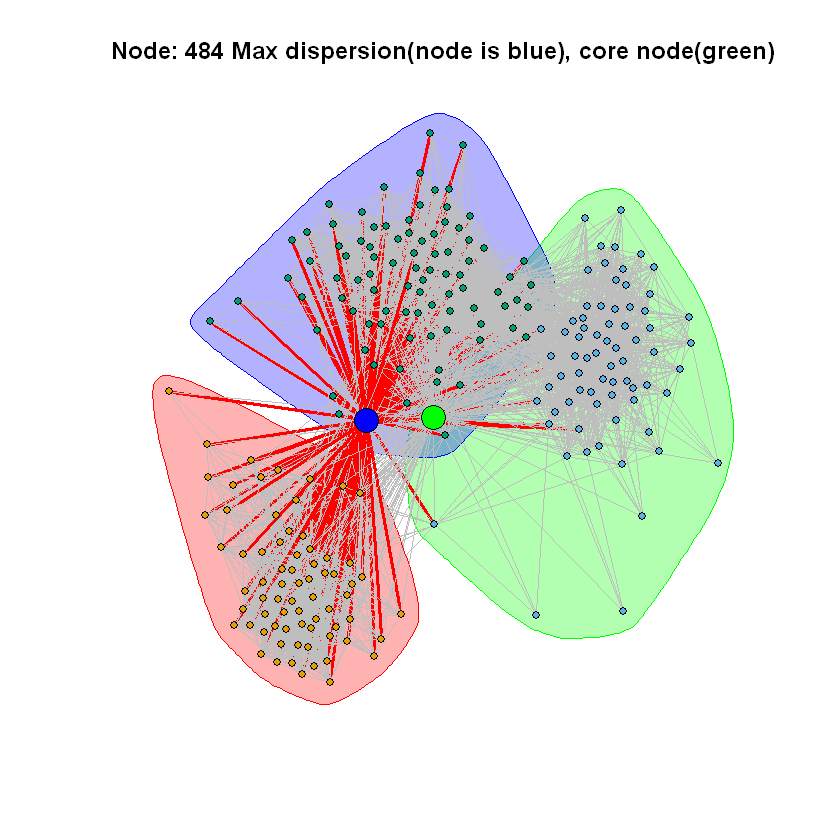

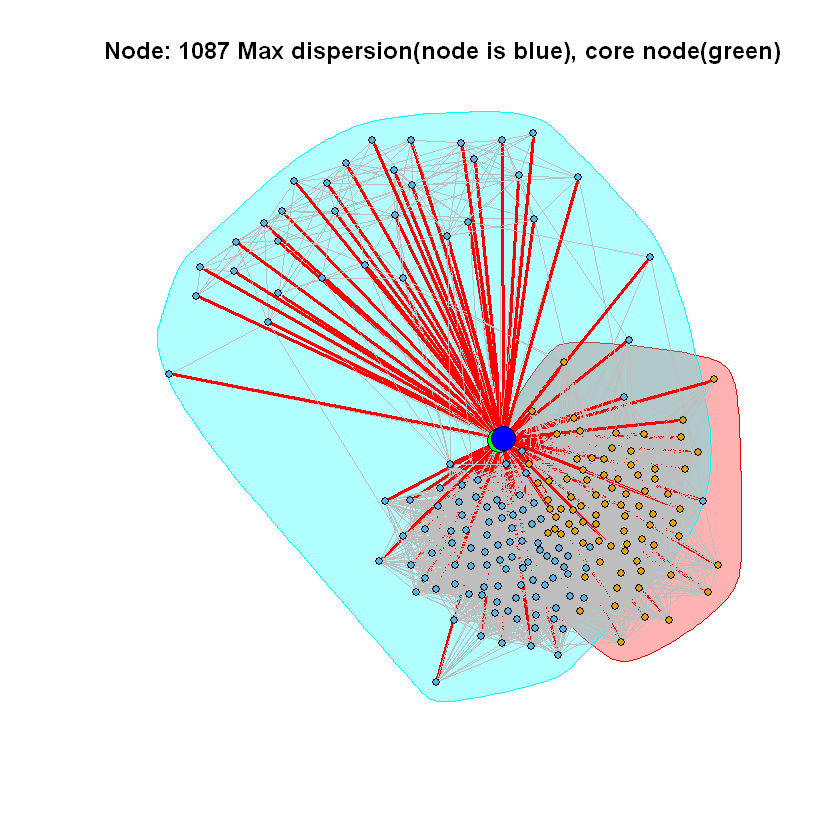

In [255]:
nodes_pool <- c(1, 108, 349, 484, 1087)
for(core in nodes_pool){
    eg <- make_ego_graph(g, order=1, nodes=core, mode="all")[[1]]
    core_id <- which.max(degree(eg))
    nodes <- neighbors(eg,core_id)
    dispersions <- c()
    embeds <- c()
    for (node in nodes){
        dp <- dispersion(eg,core_id,node)
        embed <- embeddedness(eg,node)
        embeds <- c(embeds,embed)
        dispersions <- c(dispersions,dp)
    }
    max_dispersion <- which.max(dispersions)
    if (which.max(dispersions)>core_id){
        max_dispersion <- max_dispersion + 1
    }
    else{
        max_dispersion <- max_dispersion
    }
    cat('\nPersonalized network of node',core)
    cat('\nNode index for max dispersion is',max_dispersion)
    eg_com <- cluster_fast_greedy(eg)
    n_col <- membership(eg_com)
    n_col[max_dispersion] = 'blue'
    n_col[core_id] = 'Green'
    n_size = rep(3, vcount(eg))
    n_size[max_dispersion]= 9
    n_size[core_id] = 9
    e_color = rep("gray", length(E(eg)))
    e_width = rep(1, length(E(eg)))
    e_color[which(get.edgelist(eg, name = FALSE)[,1] == max_dispersion | 
                     get.edgelist(eg, name = FALSE)[,2] == max_dispersion)] = "red";
    e_width[which(get.edgelist(eg, name = FALSE)[,1] == max_dispersion |  
                      get.edgelist(eg, name = FALSE)[,2] == max_dispersion)] = 3;
    plot(eg_com, eg, vertex.size=n_size, vertex.label=NA, 
         col=n_col, edge.color=e_color, edge.width=e_width, layout=layout_with_fr(eg), 
         main=paste('Node:',core,'Max dispersion(node is blue), core node(green)'))
    }


Personalized network of node 1
Node index for max embed is 57
Node index for max dispersion/embeddedness ratio is 323
Personalized network of node 108
Node index for max embed is 1023
Node index for max dispersion/embeddedness ratio is 1023

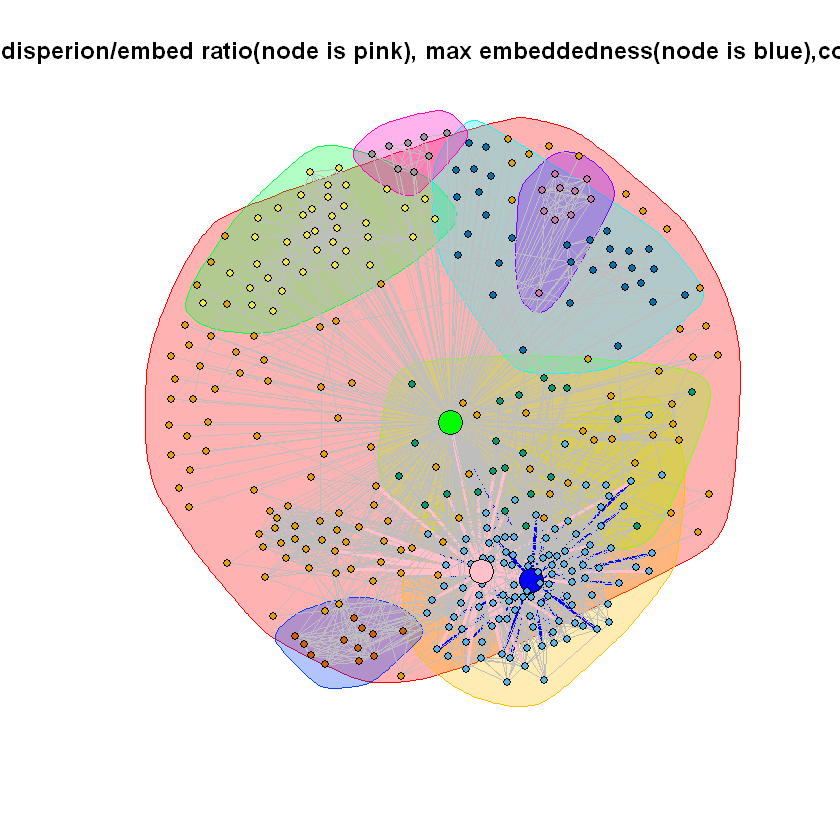


Personalized network of node 349
Node index for max embed is 33
Node index for max dispersion/embeddedness ratio is 33

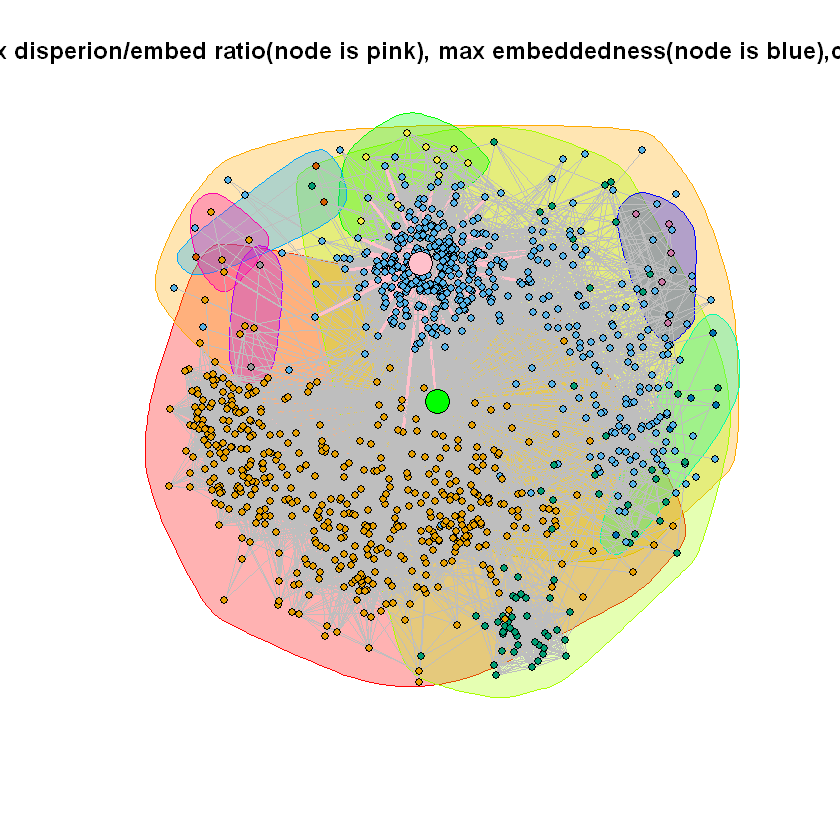


Personalized network of node 484
Node index for max embed is 1
Node index for max dispersion/embeddedness ratio is 1

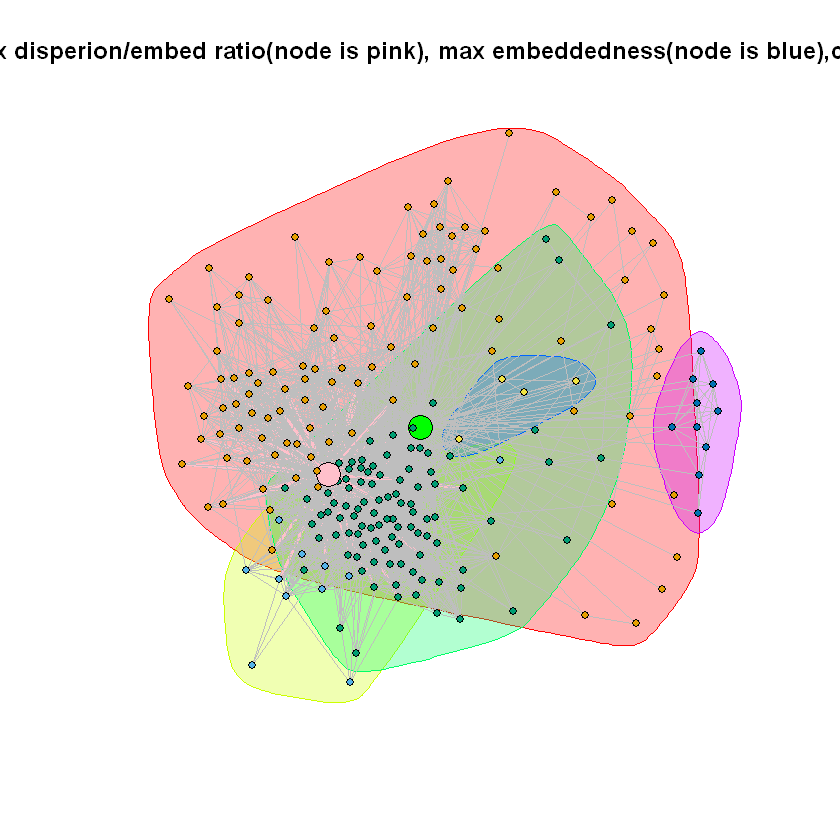


Personalized network of node 1087
Node index for max embed is 38
Node index for max dispersion/embeddedness ratio is 38

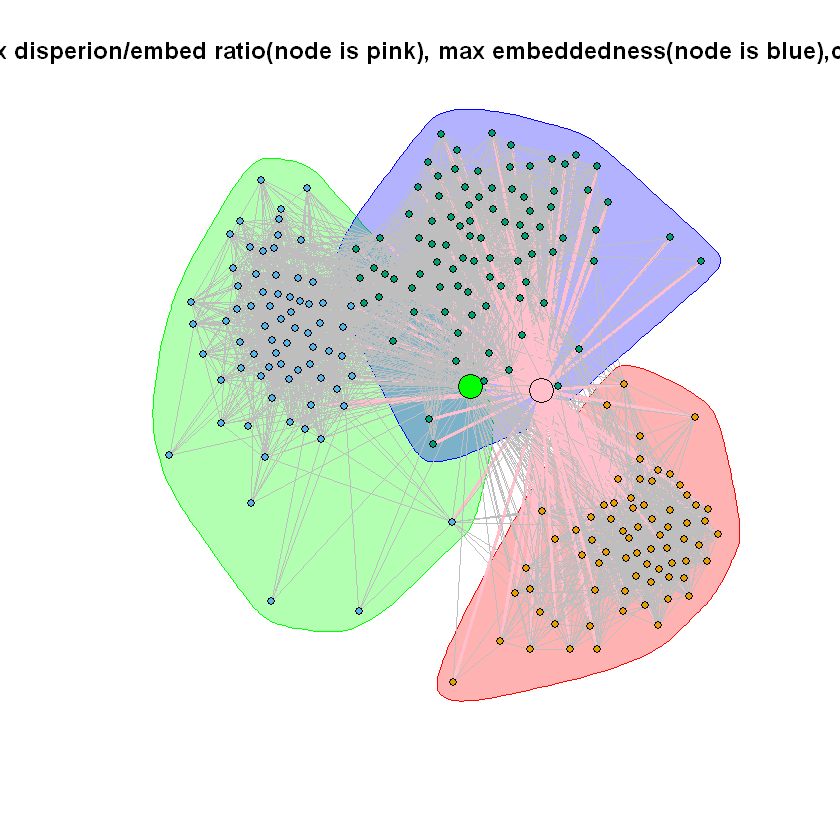

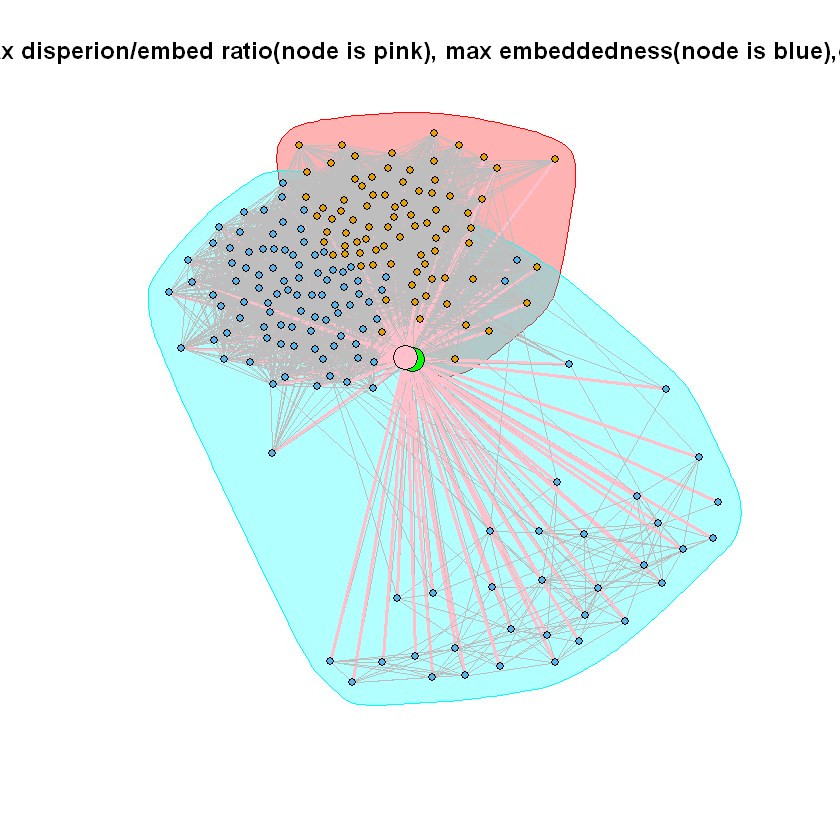

In [254]:
nodes_pool <- c(1, 108, 349, 484, 1087)
for(core in nodes_pool){
    eg <- make_ego_graph(g, order=1, nodes=core, mode="all")[[1]]
    core_id <- which.max(degree(eg))
    nodes <- neighbors(eg,core_id)
    dispersions <- c()
    embeds <- c()
    for (node in nodes){
        dp <- dispersion(eg,core_id,node)
        embed <- embeddedness(eg,node)
        embeds <- c(embeds,embed)
        dispersions <- c(dispersions,dp)
    }
    ratios <- dispersions/embeds
    max_embed <- which.max(embeds)
    max_dispersion <- which.max(dispersions)
    max_ratio <- which.max(ratios)
    if (which.max(dispersions)>core_id){
        max_dispersion <- max_dispersion + 1
    }
    else{
        max_dispersion <- max_dispersion
    }
    if (which.max(embeds)>core_id){
        max_embed <- max_embed + 1
    }
    else{
        max_embed <- max_embed
    }
    if (which.max(ratios) > core_id){
        max_ratio <- max_ratio + 1
    }
    else{
        max_ratio <- max_ratio
    }
    cat('\nPersonalized network of node',core)
    cat('\nNode index for max embed is',max_embed)
    cat('\nNode index for max dispersion/embeddedness ratio is',max_ratio)
    
    eg_com <- cluster_fast_greedy(eg)
    n_col <- membership(eg_com)
    n_col[max_embed] = 'blue'
    n_col[max_ratio] = 'pink'
    n_col[core_id] = 'Green'
    n_size = rep(3, vcount(eg))
    n_size[max_embed]= 9
    n_size[max_ratio]= 9
    n_size[core_id] = 9
    e_color = rep("gray", length(E(eg)))
    e_width = rep(1, length(E(eg)))
    e_color[which(get.edgelist(eg, name = FALSE)[,1] == max_embed | 
                     get.edgelist(eg, name = FALSE)[,2] == max_embed)] = "blue";
    e_width[which(get.edgelist(eg, name = FALSE)[,1] == max_embed |  
                      get.edgelist(eg, name = FALSE)[,2] == max_embed)] = 3;
    e_color[which(get.edgelist(eg, name = FALSE)[,1] == max_ratio | 
                     get.edgelist(eg, name = FALSE)[,2] == max_ratio)] = "pink";
    e_width[which(get.edgelist(eg, name = FALSE)[,1] == max_ratio |  
                      get.edgelist(eg, name = FALSE)[,2] == max_ratio)] = 3;
    plot(eg_com, eg, vertex.size=n_size, vertex.label=NA, 
         col=n_col, edge.color=e_color, edge.width=e_width, layout=layout_with_fr(eg), 
         main=paste('Node:',core,'Max disperion/embed ratio(node is pink), max embeddedness(node is blue),core node is green'))
    }


Personalized network of node 1
Node index for max embed is 57
Node index for max dispersion/embeddedness ratio is 323
Personalized network of node 108
Node index for max embed is 1023
Node index for max dispersion/embeddedness ratio is 1023

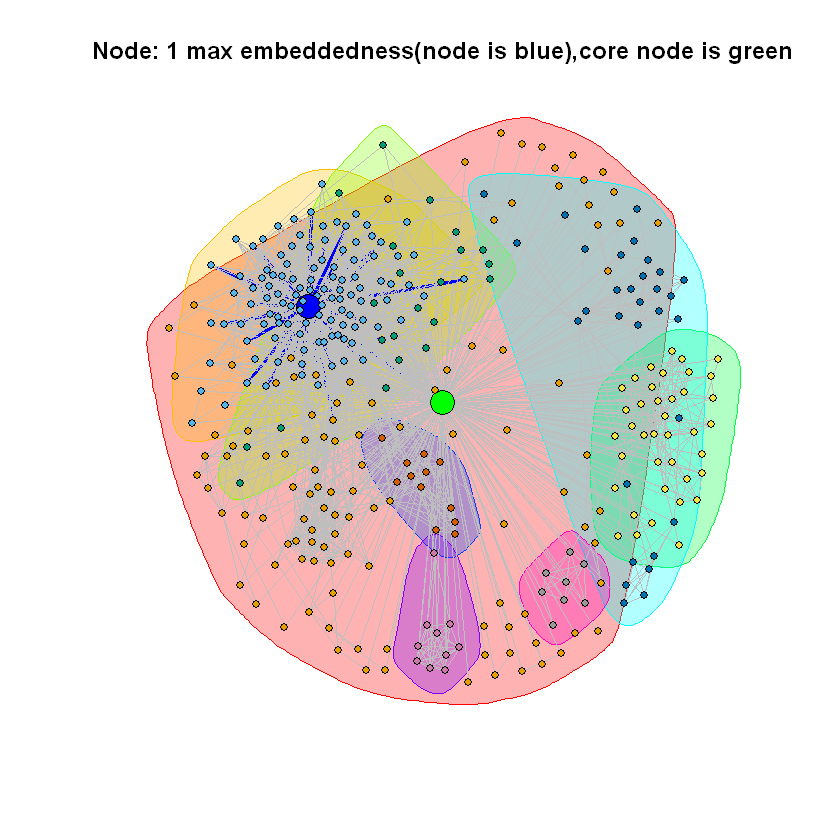


Personalized network of node 349
Node index for max embed is 33
Node index for max dispersion/embeddedness ratio is 33

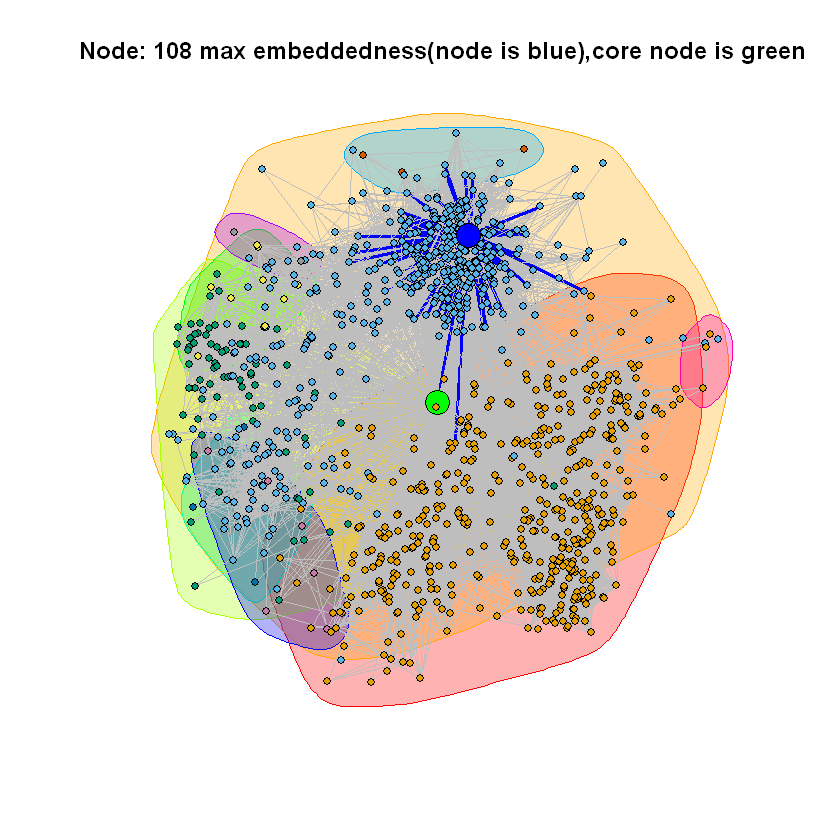


Personalized network of node 484
Node index for max embed is 1
Node index for max dispersion/embeddedness ratio is 1

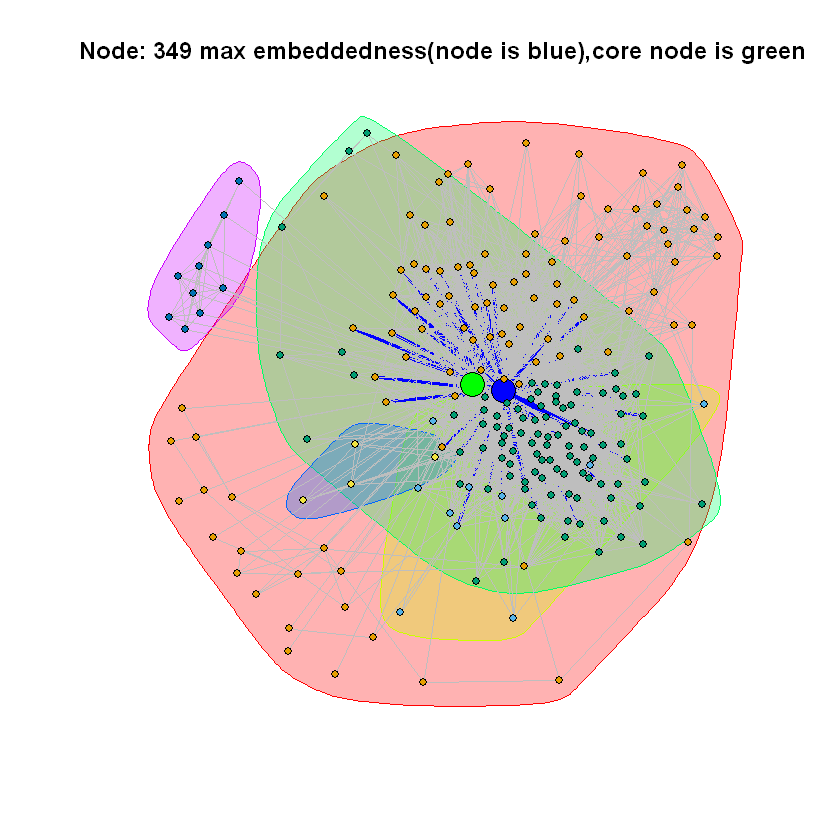


Personalized network of node 1087
Node index for max embed is 38
Node index for max dispersion/embeddedness ratio is 38

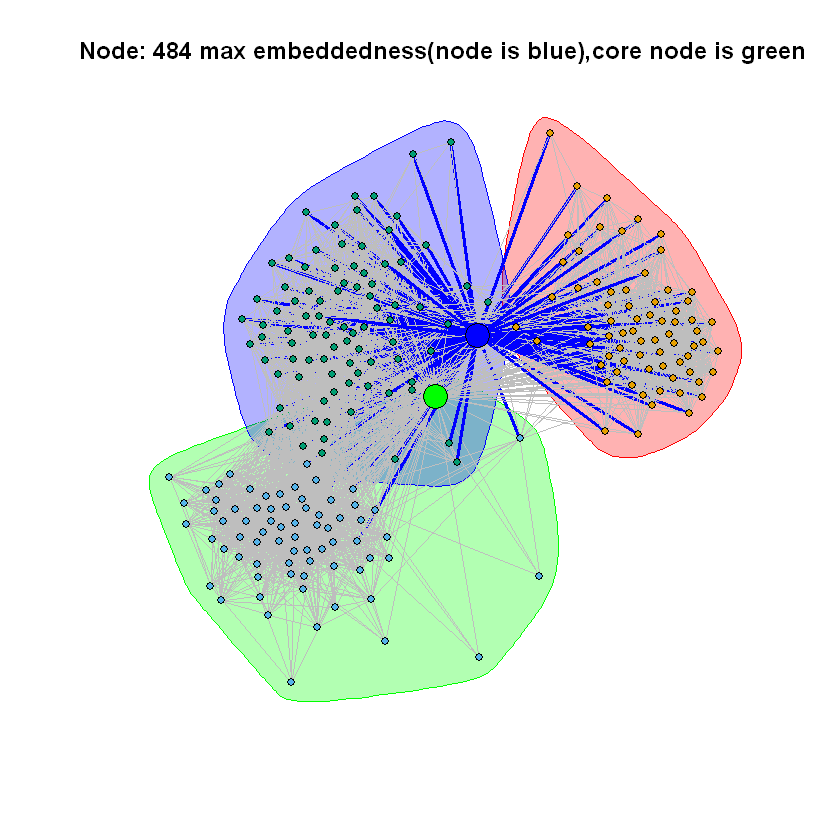

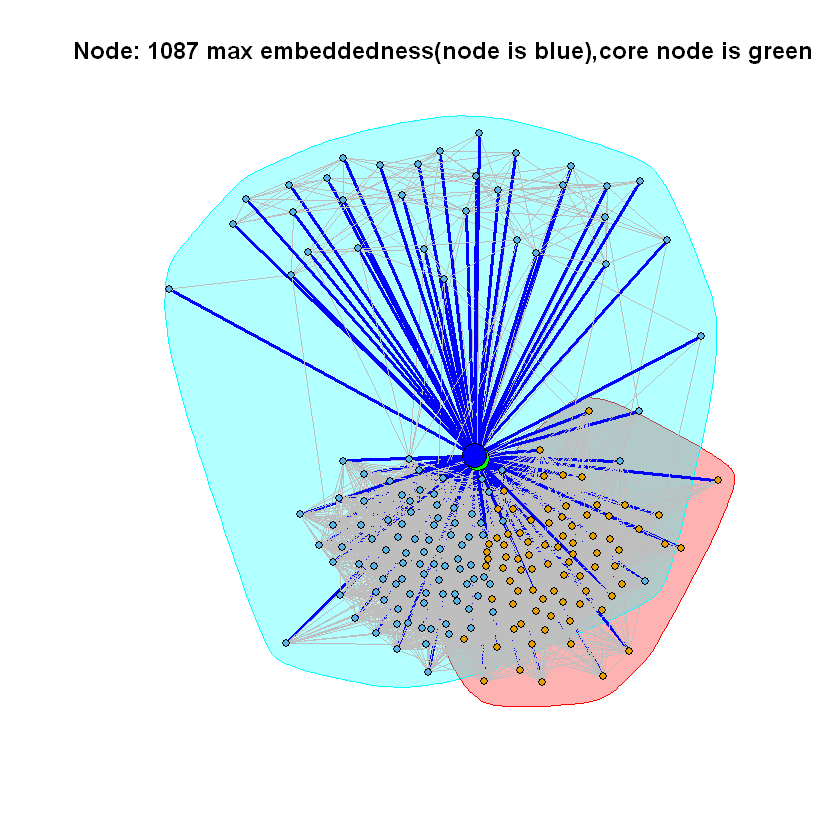

In [256]:
nodes_pool <- c(1, 108, 349, 484, 1087)
for(core in nodes_pool){
    eg <- make_ego_graph(g, order=1, nodes=core, mode="all")[[1]]
    core_id <- which.max(degree(eg))
    nodes <- neighbors(eg,core_id)
    dispersions <- c()
    embeds <- c()
    for (node in nodes){
        dp <- dispersion(eg,core_id,node)
        embed <- embeddedness(eg,node)
        embeds <- c(embeds,embed)
        dispersions <- c(dispersions,dp)
    }
    ratios <- dispersions/embeds
    max_embed <- which.max(embeds)
    max_dispersion <- which.max(dispersions)
    max_ratio <- which.max(ratios)
    if (which.max(dispersions)>core_id){
        max_dispersion <- max_dispersion + 1
    }
    else{
        max_dispersion <- max_dispersion
    }
    if (which.max(embeds)>core_id){
        max_embed <- max_embed + 1
    }
    else{
        max_embed <- max_embed
    }
    if (which.max(ratios) > core_id){
        max_ratio <- max_ratio + 1
    }
    else{
        max_ratio <- max_ratio
    }
    cat('\nPersonalized network of node',core)
    cat('\nNode index for max embed is',max_embed)
    cat('\nNode index for max dispersion/embeddedness ratio is',max_ratio)
    
    eg_com <- cluster_fast_greedy(eg)
    n_col <- membership(eg_com)
    n_col[max_embed] = 'blue'
    #n_col[max_ratio] = 'pink'
    n_col[core_id] = 'Green'
    n_size = rep(3, vcount(eg))
    n_size[max_embed]= 9
  #  n_size[max_ratio]= 9
    n_size[core_id] = 9
    e_color = rep("gray", length(E(eg)))
    e_width = rep(1, length(E(eg)))
    e_color[which(get.edgelist(eg, name = FALSE)[,1] == max_embed | 
                     get.edgelist(eg, name = FALSE)[,2] == max_embed)] = "blue";
    e_width[which(get.edgelist(eg, name = FALSE)[,1] == max_embed |  
                      get.edgelist(eg, name = FALSE)[,2] == max_embed)] = 3;
   # e_color[which(get.edgelist(eg, name = FALSE)[,1] == max_ratio | 
   #                  get.edgelist(eg, name = FALSE)[,2] == max_ratio)] = "pink";
  #  e_width[which(get.edgelist(eg, name = FALSE)[,1] == max_ratio |  
  #                    get.edgelist(eg, name = FALSE)[,2] == max_ratio)] = 3;
    plot(eg_com, eg, vertex.size=n_size, vertex.label=NA, 
         col=n_col, edge.color=e_color, edge.width=e_width, layout=layout_with_fr(eg), 
         main=paste('Node:',core,'Max embeddedness(node is blue),core node is green'))
    }

## Part1_4 Friend recommendation in personalized networks

### 1_4 Question 16